# **2024 Stack Overflow Survey - Exploratory Data Analysis**


**Install and Import Necessary Python Libraries**

In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install scipy

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey_data.csv')

# Display the first few rows of the data
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

**Create a SQLite Database and Insert the Data**


In [5]:
# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**


In [7]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
df_check


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                               None   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                               None  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                   None       None                None   None  
1             0.0                   None       None                None   None  
2             NaN  Appropriate in length       Easy                None   None  
3             NaN               Too long       Easy                None   None  
4             NaN              Too short       Easy                None   None  

[5 rows x 114 columns]

To view the record count in the database:

In [9]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65437

To view the names of all tables in the database:


In [11]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

Group data by a specific column, like Age, to get the count of respondents in each age group:


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

## Open the Connection

In [74]:
# Connect to the SQL database
conn = sqlite3.connect('survey-data.sqlite')

## Visualizing the Distribution of Data

Distribution of Compensation Data (excluding outliers)

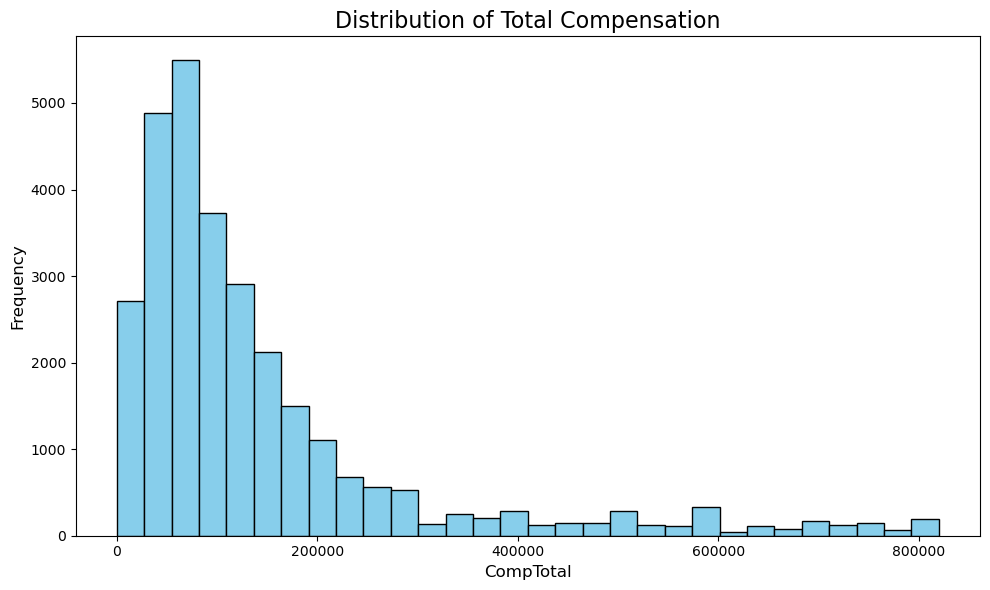

In [17]:
# Query the 'CompTotal' column from the 'main' table
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Drop rows where 'CompTotal' is null
df_comp_cleaned = df.dropna(subset=['CompTotal'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_comp_cleaned['CompTotal'].quantile(0.25)
Q3 = df_comp_cleaned['CompTotal'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Remove outliers in ConvertedCompYearly
df_no_outliers = df_comp_cleaned[(df_comp_cleaned['CompTotal'] >= lower_bound) & 
                                 (df_comp_cleaned['CompTotal'] <= upper_bound)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation', fontsize=16)
plt.xlabel('CompTotal', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


Bubble Plot for Compensation (ConvertedCompYearly) Across Developer Roles (DevType)
Bubble size represents job satisfaction

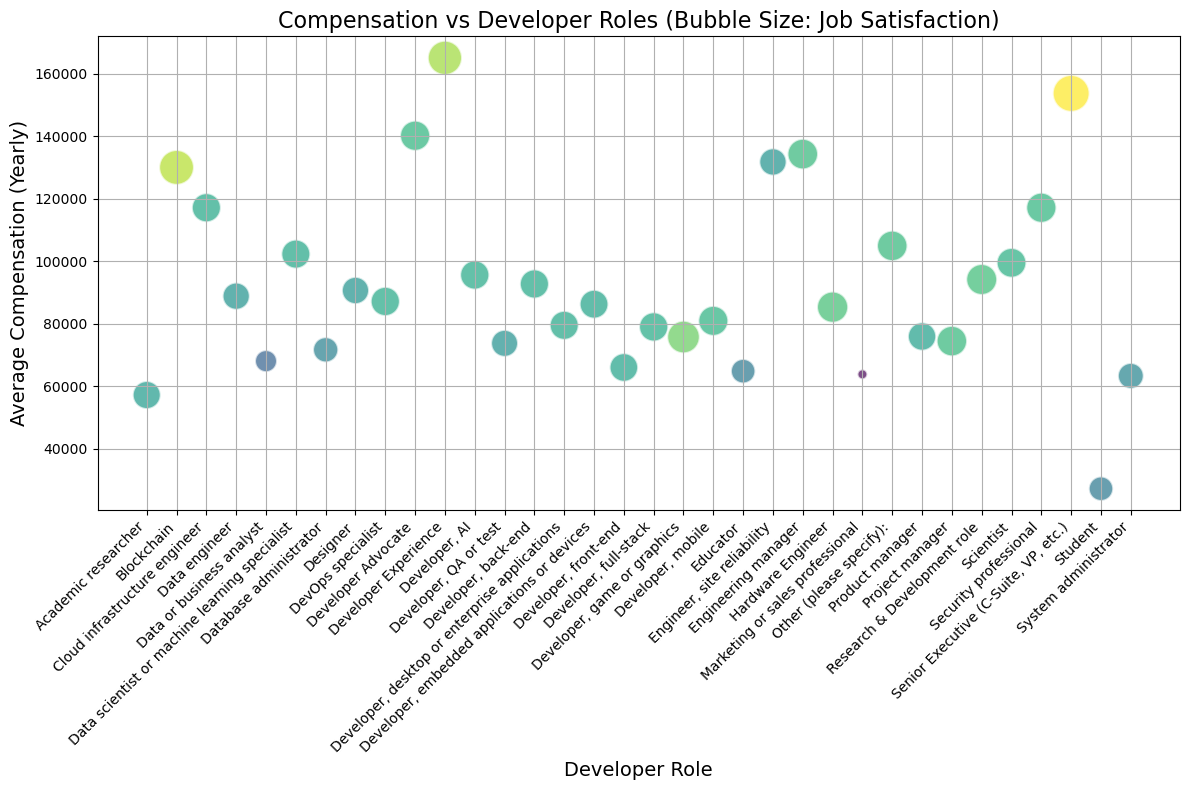

In [20]:
# Clean the data (remove rows with missing DevType, ConvertedCompYearly, or JobSat)
df_filtered_roles = df_no_outliers.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Group by DevType and calculate the mean compensation and job satisfaction
df_roles_compensation = df_filtered_roles.groupby('DevType').agg(
    avg_compensation=('ConvertedCompYearly', 'mean'),
    avg_job_satisfaction=('JobSat', 'mean'),
    count=('DevType', 'size')
).reset_index()

# Create the bubble plot
plt.figure(figsize=(12, 8))
plt.title('Compensation vs Developer Roles (Bubble Size: Job Satisfaction)', fontsize=16)
plt.xlabel('Developer Role', fontsize=14)
plt.ylabel('Average Compensation (Yearly)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Use DevType for x-axis, avg_compensation for y-axis, and bubble size for avg_job_satisfaction
sns.scatterplot(x='DevType', y='avg_compensation', size='avg_job_satisfaction', sizes=(50, 700),
                data=df_roles_compensation, alpha=0.7, palette='viridis', hue='avg_job_satisfaction', legend=False)

# Display the plot
plt.tight_layout()
plt.show()


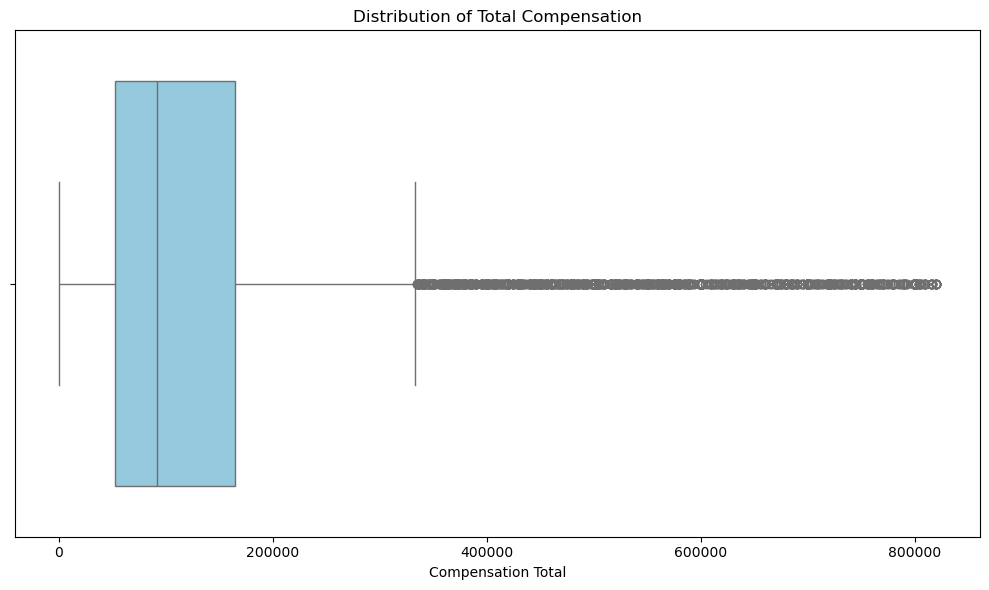

In [22]:
# Remove rows with missing 'CompTotal' values
df_filtered = df_no_outliers[df_no_outliers['CompTotal'].notna()]

# Create a box plot for 'CompTotal'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='CompTotal', color='skyblue')
plt.title('Distribution of Total Compensation')
plt.xlabel('Compensation Total')
plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.tight_layout()
plt.show()


Box plot of Age.


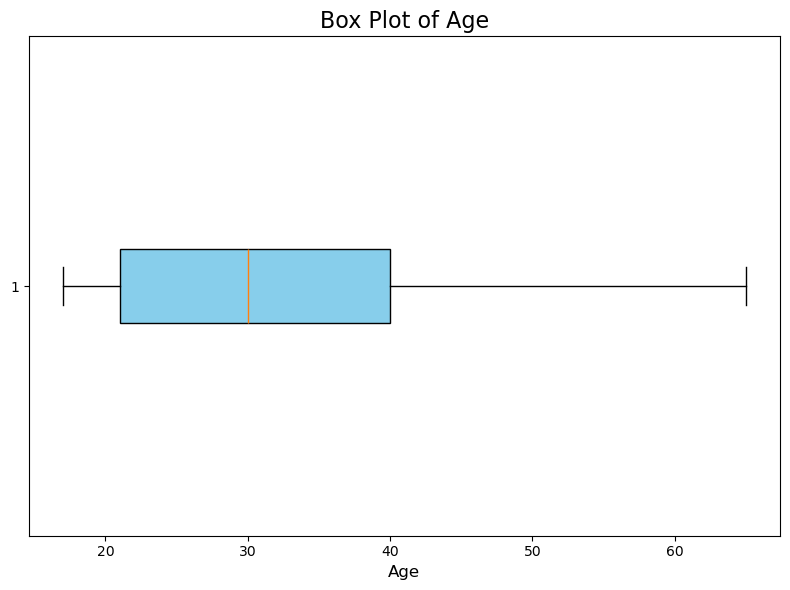

In [24]:
# Query the 'Age' column from the 'main' table
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Map the categorical age values to approximate numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None
}

# Apply the mapping to the 'Age' column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing or 'Prefer not to say' ages
df.dropna(subset=['Age_numeric'], inplace=True)

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age_numeric'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Visualize the distribution of compensation across different age groups

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/3548746408.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_no_outliers[df_no_outliers['CompTotal'].notna() & df['Age'].notna()]
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/3548746408.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Age', y='CompTotal', order=age_categories, palette='Set3')


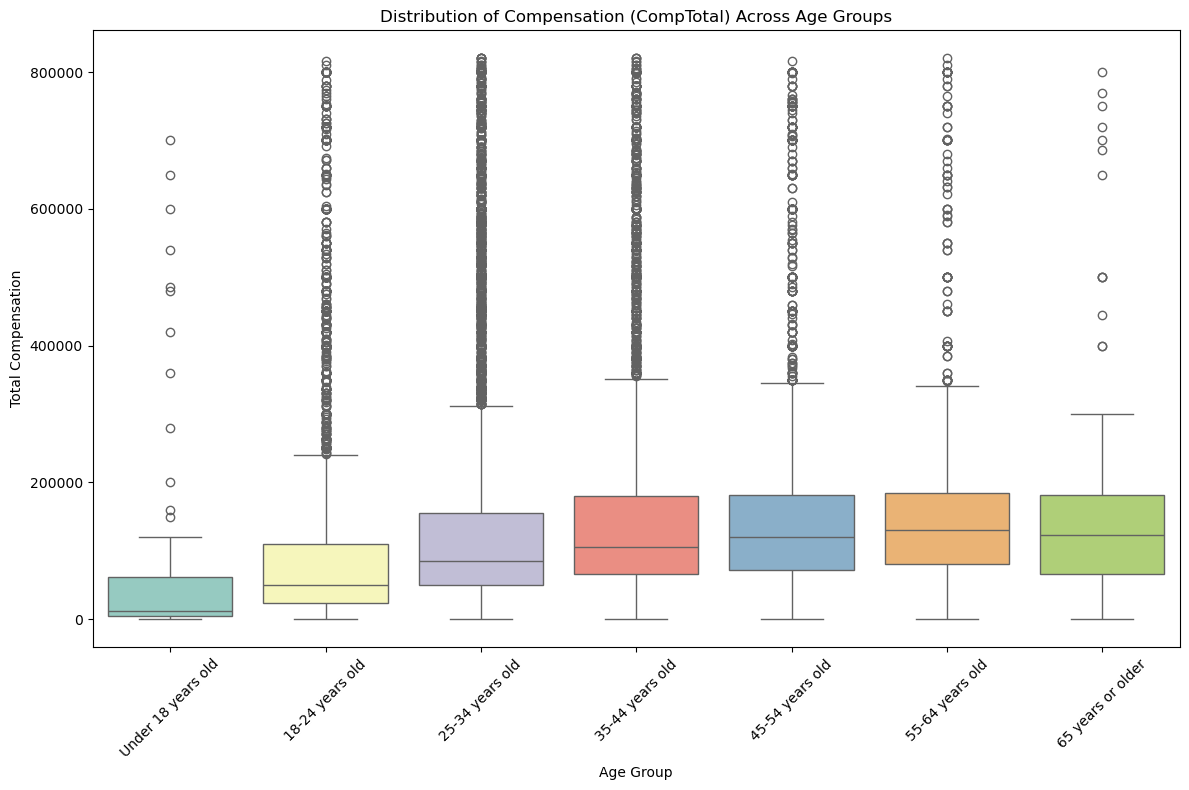

In [26]:
# Remove rows with missing 'CompTotal' or 'Age' values
df_filtered = df_no_outliers[df_no_outliers['CompTotal'].notna() & df['Age'].notna()]

# Define the order of the age categories for visualization
age_categories = ['Under 18 years old', '18-24 years old', '25-34 years old', 
                  '35-44 years old', '45-54 years old', '55-64 years old', 
                  '65 years or older']

# Create a boxplot for 'CompTotal' across different 'Age' groups
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='Age', y='CompTotal', order=age_categories, palette='Set3')
plt.title('Distribution of Compensation (CompTotal) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Compensation across job satisfaction levels

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/2251366186.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='JobSatPoints_6', y='CompTotal', palette='Set2')


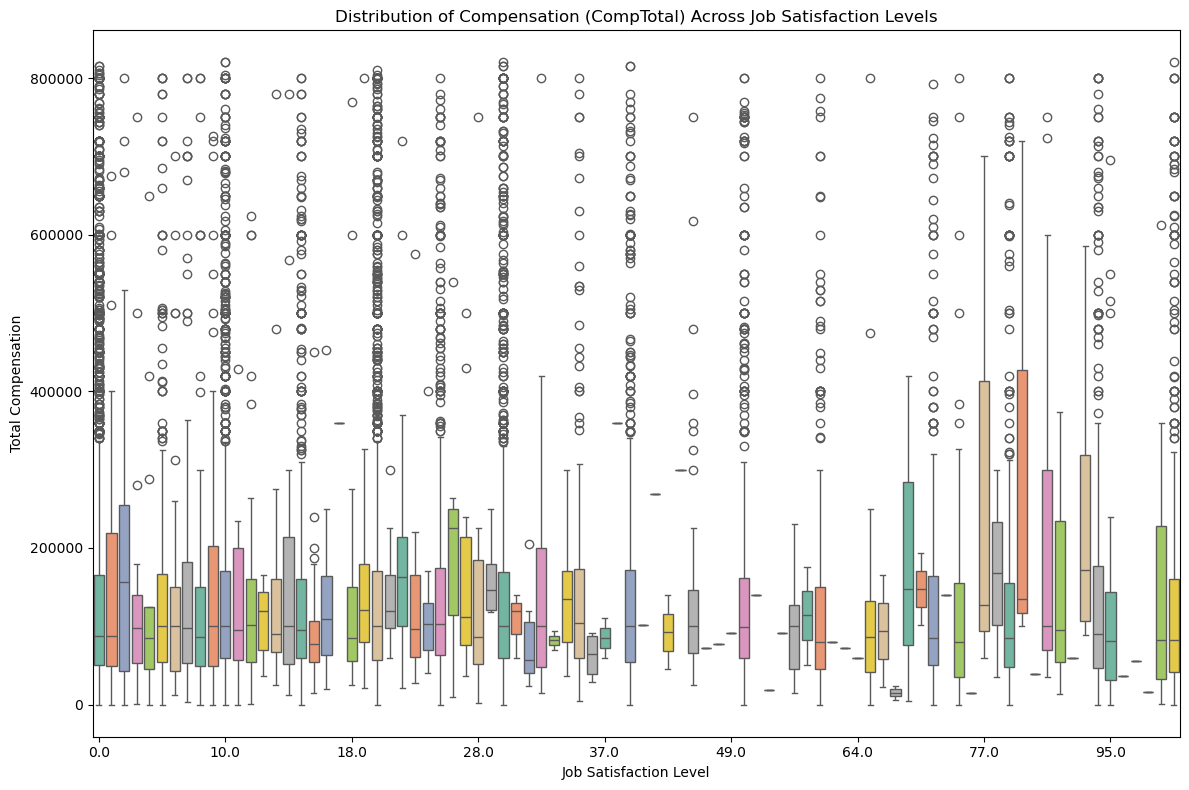

In [28]:
import matplotlib.ticker as ticker

# Remove rows with missing 'CompTotal' or 'JobSatPoints_6' values
df_filtered = df_no_outliers[df_no_outliers['CompTotal'].notna() & df_no_outliers['JobSatPoints_6'].notna()]

# Create a boxplot for 'CompTotal' grouped by 'JobSatPoints_6'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='JobSatPoints_6', y='CompTotal', palette='Set2')
plt.title('Distribution of Compensation (CompTotal) Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Total Compensation')
plt.ticklabel_format(style='plain', axis='y')

# Set a maximum number of x-axis ticks
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Step 4: Show the plot
plt.tight_layout()
plt.show()


Compensation across the top 5 developer roles.

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/4199442858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_5_dev_types, x='DevType', y='ConvertedCompYearly', palette='Set2')


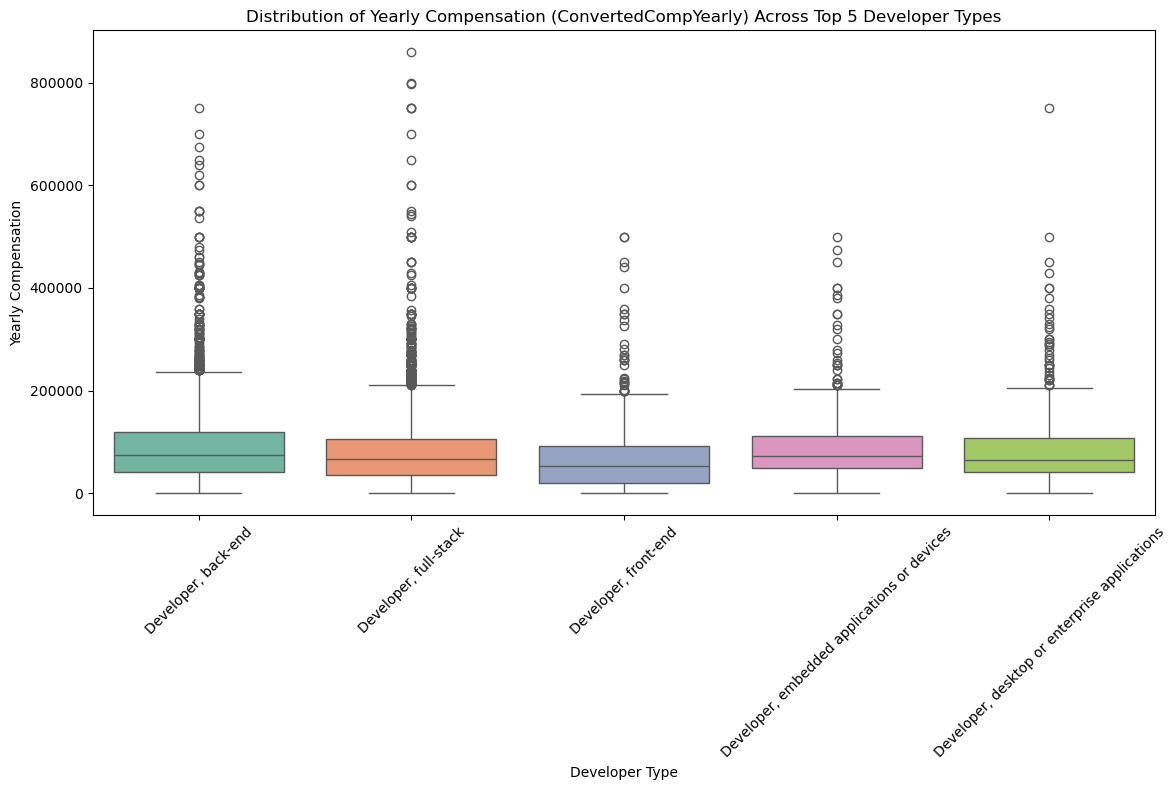

In [30]:
# Filter out missing values in 'DevType' and 'ConvertedCompYearly'
df_filtered = df_no_outliers[df_no_outliers['DevType'].notna() & df_no_outliers['ConvertedCompYearly'].notna()]

# Get the top 5 most frequent Developer Types
top_5_dev_types = df_filtered['DevType'].value_counts().nlargest(5).index

# Filter the dataset to only include the top 5 Developer Types
df_top_5_dev_types = df_filtered[df_filtered['DevType'].isin(top_5_dev_types)]

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_5_dev_types, x='DevType', y='ConvertedCompYearly', palette='Set2')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly) Across Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.tight_layout()
plt.show()


Bubble Plot for Age vs. Frequency of Participation¶
Size of bubbles represents their job satisfaction (JobSat)

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/2403815529.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age_numeric'] = df_filtered['Age'].map(age_mapping)


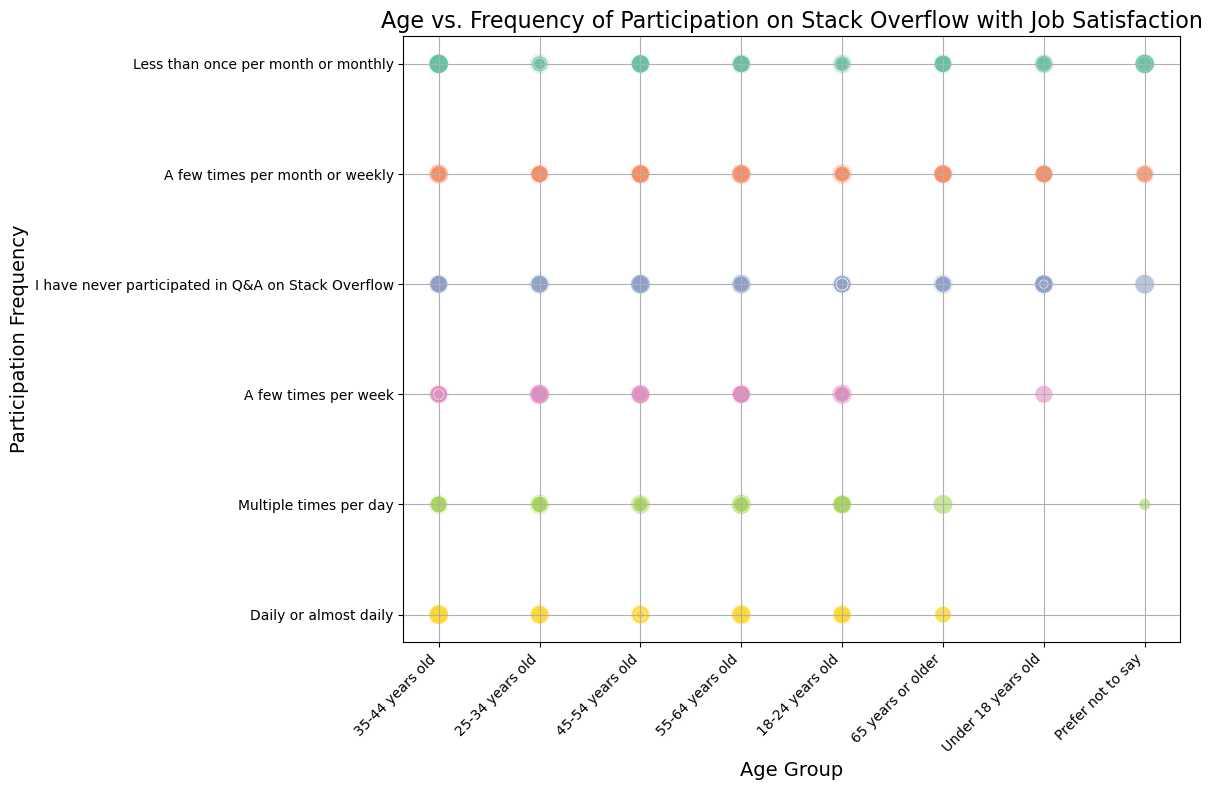

In [32]:
# Original SOPartFreq options
sopartfreq_options = ['Multiple times per day', 'Daily or almost daily',
                      'A few times per week', 'A few times per month or weekly',
                      'Less than once per month or monthly',
                      'I have never participated in Q&A on Stack Overflow']

# Use the same age mapping as before
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None
}

# Apply the age mapping to the 'Age' column
df_filtered['Age_numeric'] = df_filtered['Age'].map(age_mapping)

# Filter out rows with missing 'Age', 'SOPartFreq', or 'JobSat'
df_filtered_bubble = df_filtered.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Create the bubble plot with categorical labels
plt.figure(figsize=(12, 8))

# Create a scatterplot using 'Age' (categorical) as x-axis and 'SOPartFreq' (categorical) as y-axis
sns.scatterplot(x='Age', y='SOPartFreq', size='JobSat', sizes=(20, 200), data=df_filtered_bubble,
                hue='SOPartFreq', palette='Set2', alpha=0.6, legend=False)

# Customize the plot
plt.title('Age vs. Frequency of Participation on Stack Overflow with Job Satisfaction', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Participation Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # y-axis labels for SOPartFreq
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



Relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSat).
Size of the bubbles represents respondents’ age.

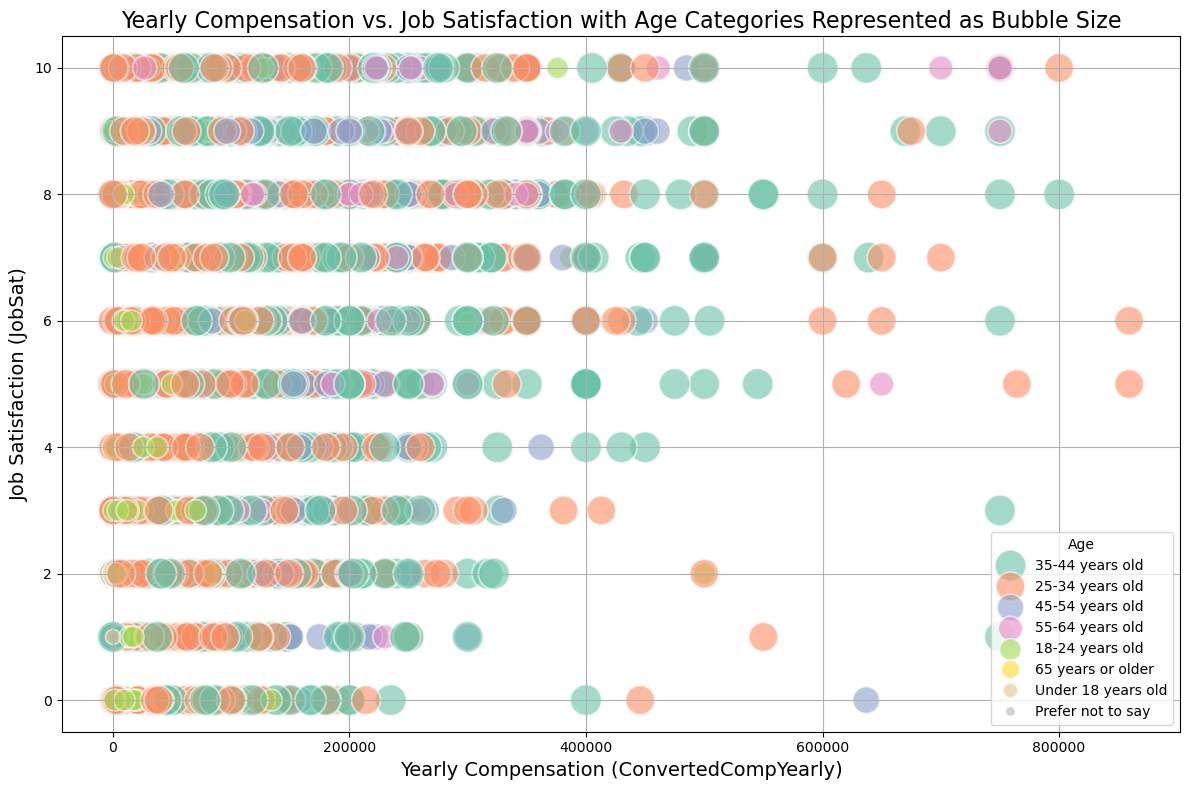

In [34]:
# Filter out rows with missing 'ConvertedCompYearly', 'JobSat', or 'Age'
df_filtered_bubble = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Create the bubble plot with 'Age' as categorical size
plt.figure(figsize=(12, 8))

# Bubble plot with x-axis as yearly compensation, y-axis as job satisfaction, and bubble size for age groups
sns.scatterplot(x='ConvertedCompYearly', y='JobSat', size='Age', sizes=(50, 500),
                data=df_filtered_bubble, hue='Age', alpha=0.6, palette='Set2')

# Customize the plot
plt.title('Yearly Compensation vs. Job Satisfaction with Age Categories Represented as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.ylabel('Job Satisfaction (JobSat)', fontsize=14)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Composition of job satisfaction scores (JobSatPoints_6 and JobSatPoints_7) across various age groups.

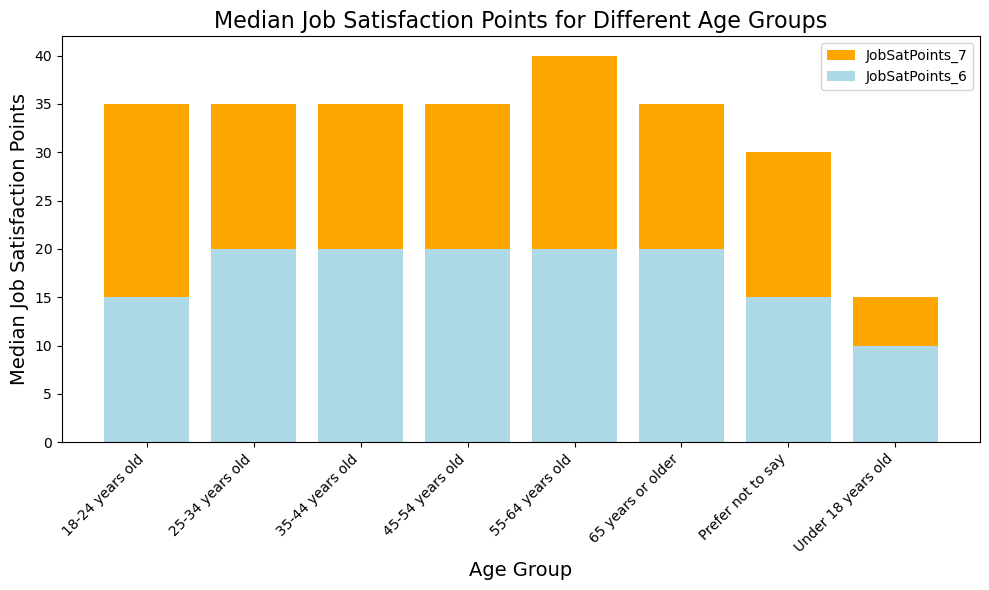

In [36]:
# Remove rows with missing values in 'JobSatPoints_6', 'JobSatPoints_7', and 'Age')
df_filtered_clean = df_filtered.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Age'])

# Group the data by Age and calculate the median values for JobSatPoints_6 and JobSatPoints_7
age_group_medians = df_filtered_clean.groupby('Age').agg({'JobSatPoints_6': 'median', 'JobSatPoints_7': 'median'}).reset_index()

# Create stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars for JobSatPoints_6 and JobSatPoints_7
plt.bar(age_group_medians['Age'], age_group_medians['JobSatPoints_6'], label='JobSatPoints_6', color='lightblue')
plt.bar(age_group_medians['Age'], age_group_medians['JobSatPoints_7'], bottom=age_group_medians['JobSatPoints_6'], label='JobSatPoints_7', color='orange')

# Customize the plot
plt.title('Median Job Satisfaction Points for Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Job Satisfaction Points', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Job satisfaction (JobSatPoints_6 and JobSatPoints_7) across different employment types

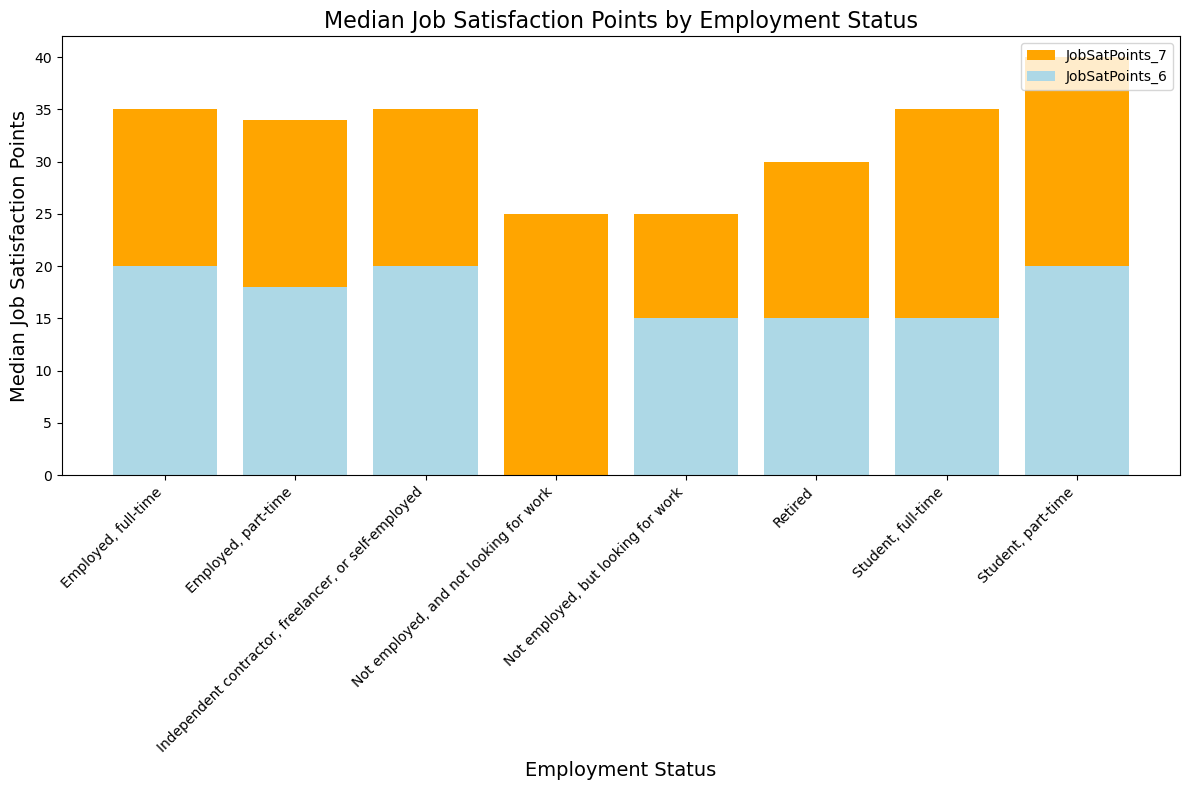

In [38]:

# Remove rows with missing values in 'JobSatPoints_6', 'JobSatPoints_7', and 'Employment'
df_filtered_clean = df_filtered.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Employment'])

# Split 'Employment' by ';' and explode into separate rows for each employment type
df_filtered_clean = df_filtered_clean.assign(Employment=df_filtered_clean['Employment'].str.split(';')).explode('Employment')

# Group the data by Employment and calculate the median values for JobSatPoints_6 and JobSatPoints_7
employment_group_medians = df_filtered_clean.groupby('Employment').agg({'JobSatPoints_6': 'median', 'JobSatPoints_7': 'median'}).reset_index()

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(employment_group_medians['Employment'], employment_group_medians['JobSatPoints_6'], label='JobSatPoints_6', color='lightblue')
plt.bar(employment_group_medians['Employment'], employment_group_medians['JobSatPoints_7'], bottom=employment_group_medians['JobSatPoints_6'], label='JobSatPoints_7', color='orange')

# Customize the plot
plt.title('Median Job Satisfaction Points by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Median Job Satisfaction Points', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(loc='upper right')

# Reverse the legend order so JobSatPoints_6 is on the bottom
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Median compensation and job satisfaction metrics across different age groups.

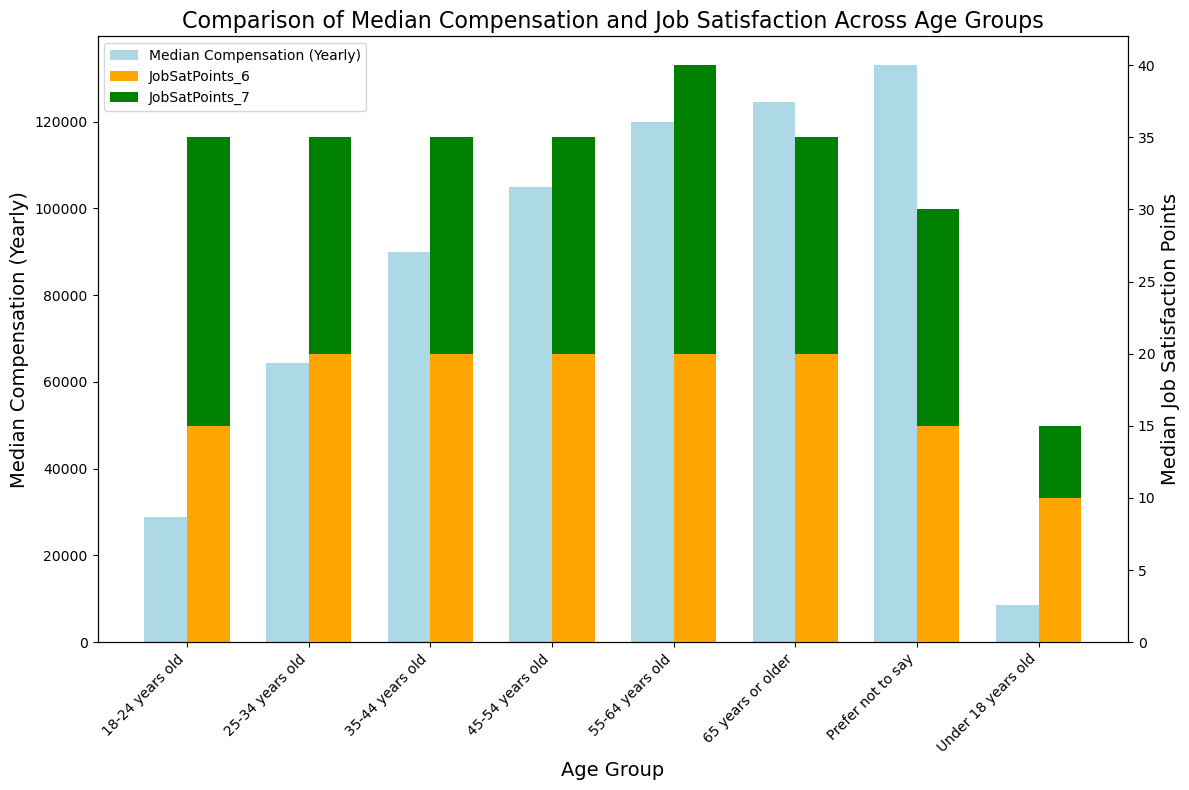

In [40]:

# Clean the data (remove rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', 'JobSatPoints_7', and 'Age')
df_filtered_clean = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'JobSatPoints_7', 'Age'])

# Group the data by Age and calculate the median values for ConvertedCompYearly, JobSatPoints_6, and JobSatPoints_7
age_group_medians = df_filtered_clean.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median',
    'JobSatPoints_7': 'median'
}).reset_index()

# Create a dual-axis bar graph with stacked job satisfaction metrics
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define bar width and x-axis positions
bar_width = 0.35
x = np.arange(len(age_group_medians['Age']))

# Plot the median compensation on the left y-axis (slightly offset for visibility)
ax1.bar(x - bar_width/2, age_group_medians['ConvertedCompYearly'], bar_width, color='lightblue', label='Median Compensation (Yearly)')
ax1.set_xlabel('Age Group', fontsize=14)
ax1.set_ylabel('Median Compensation (Yearly)', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(age_group_medians['Age'], rotation=45, ha='right')

# Create a second y-axis for the job satisfaction metrics (stacked bars)
ax2 = ax1.twinx()

# Plot the stacked bars for JobSatPoints_6 and JobSatPoints_7 on the right y-axis (slightly offset for visibility)
ax2.bar(x + bar_width/2, age_group_medians['JobSatPoints_6'], bar_width, label='JobSatPoints_6', color='orange')
ax2.bar(x + bar_width/2, age_group_medians['JobSatPoints_7'], bar_width, bottom=age_group_medians['JobSatPoints_6'], label='JobSatPoints_7', color='green')

ax2.set_ylabel('Median Job Satisfaction Points', fontsize=14)
ax2.tick_params(axis='y')

# Customize the plot
plt.title('Comparison of Median Compensation and Job Satisfaction Across Age Groups', fontsize=16)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [42]:
df_lang = df_filtered.dropna(subset=['Employment'])

# Step 2: Split the 'LanguageHaveWorkedWith' column since it may contain multiple languages for each respondent
df_lang_expanded = df_lang.assign(Employment=df_lang['Employment'].str.split(';')).explode('Employment')

df_lang_expanded['Employment'].unique()

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Student, part-time', 'Student, full-time', 'Employed, part-time',
       'Retired', 'Not employed, but looking for work',
       'Not employed, and not looking for work'], dtype=object)

Bubble Plot of Technology Preferences by Age¶

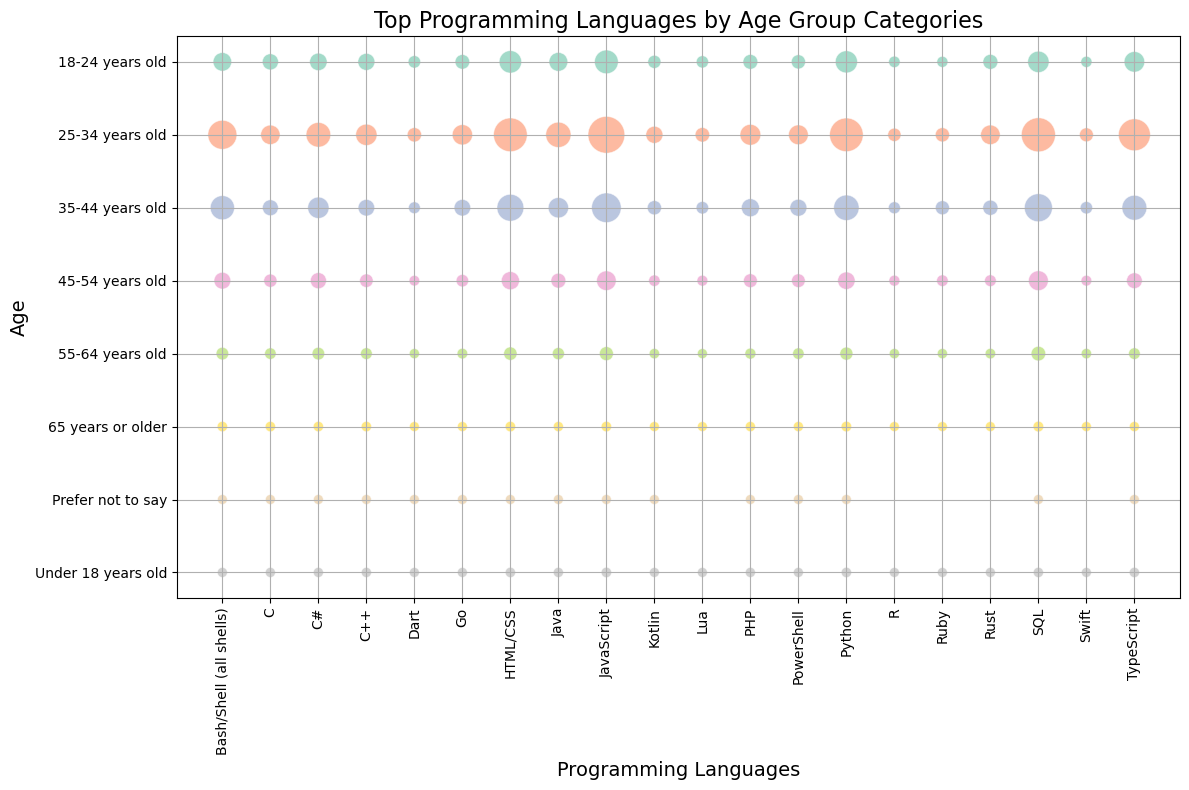

In [44]:

# Extract the 'LanguageHaveWorkedWith' and 'AgeGroup' columns
df_lang = df_filtered.dropna(subset=['LanguageHaveWorkedWith', 'Age'])

# Split the 'LanguageHaveWorkedWith' column since it may contain multiple languages for each respondent
df_lang_expanded = df_lang.assign(LanguageHaveWorkedWith=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Get the top 5 most frequent programming languages
top_languages = df_lang_expanded['LanguageHaveWorkedWith'].value_counts().nlargest(20).index

# Filter the dataset to include only the top 5 programming languages
df_lang_filtered = df_lang_expanded[df_lang_expanded['LanguageHaveWorkedWith'].isin(top_languages)]

# Count the frequency of each language for each age group
df_lang_counts = df_lang_filtered.groupby(['LanguageHaveWorkedWith', 'Age']).size().reset_index(name='Frequency')

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Bubble plot with x-axis as programming languages, y-axis as age group, and bubble size for frequency
sns.scatterplot(x='LanguageHaveWorkedWith', y='Age', size='Frequency', sizes=(50, 700),
                data=df_lang_counts, hue='Age', alpha=0.6, palette='Set2', legend=False)

#  Customize the plot
plt.title('Top Programming Languages by Age Group Categories', fontsize=16)
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Relationship between preferred databases (DatabaseWantToWorkWith) and job satisfaction.

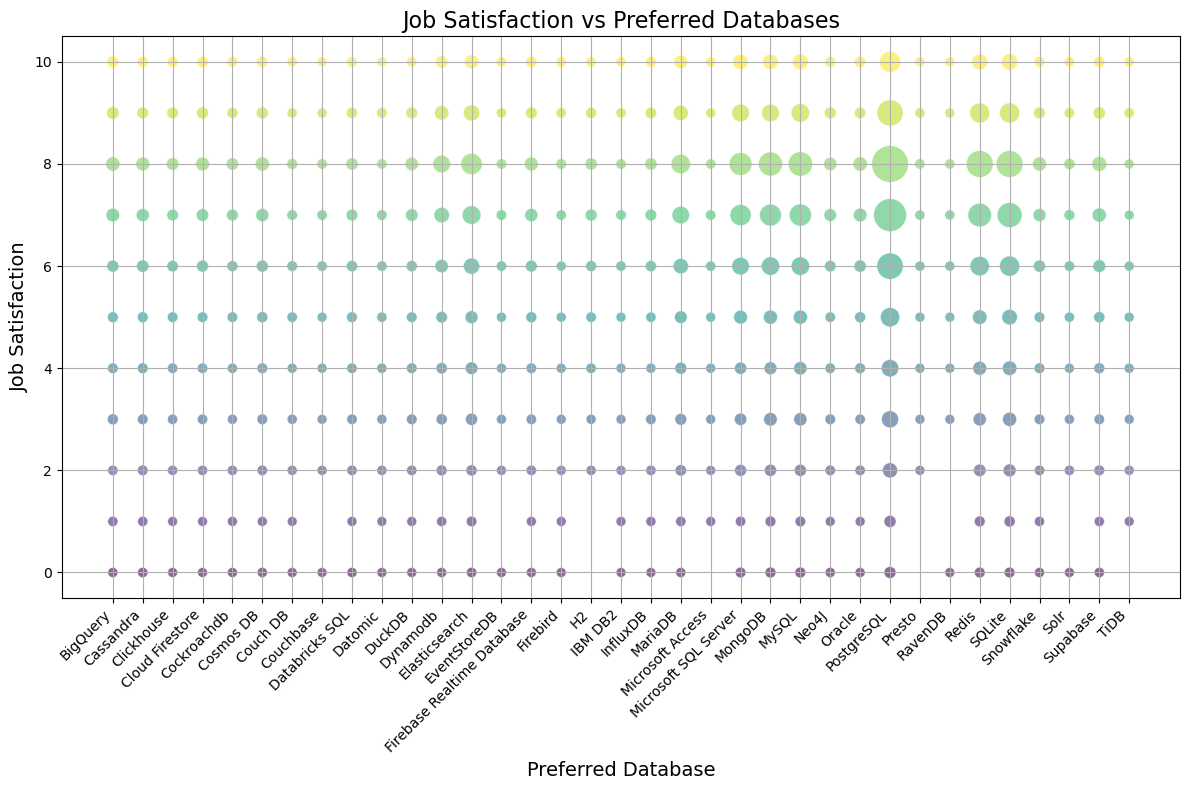

In [46]:

# Prepare the data
df_filtered_database = df_filtered.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

#  Split the 'DatabaseWantToWorkWith' column if there are multiple databases (e.g., separated by semicolons)
df_database_expanded = df_filtered_database.assign(DatabaseWantToWorkWith=df_filtered_database['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Count the number of respondents for each database and job satisfaction
df_database_counts = df_database_expanded.groupby(['DatabaseWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

#  Create the bubble plot
plt.figure(figsize=(12, 8))

# Use x-axis for databases, y-axis for job satisfaction, and size of the bubbles for frequency of respondents
sns.scatterplot(x='DatabaseWantToWorkWith', y='JobSat', size='Frequency', sizes=(50, 700),
                data=df_database_counts, hue='JobSat', alpha=0.6, palette='viridis', legend=False)

#  Customize the plot
plt.title('Job Satisfaction vs Preferred Databases', fontsize=16)
plt.xlabel('Preferred Database', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Box Plot of CompTotal for the Top 5 Countries

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/2647372332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Country'] = df_no_outliers['Country'].replace({
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/2647372332.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_5_countries, x='Country', y='CompTotal', palette='Set2')


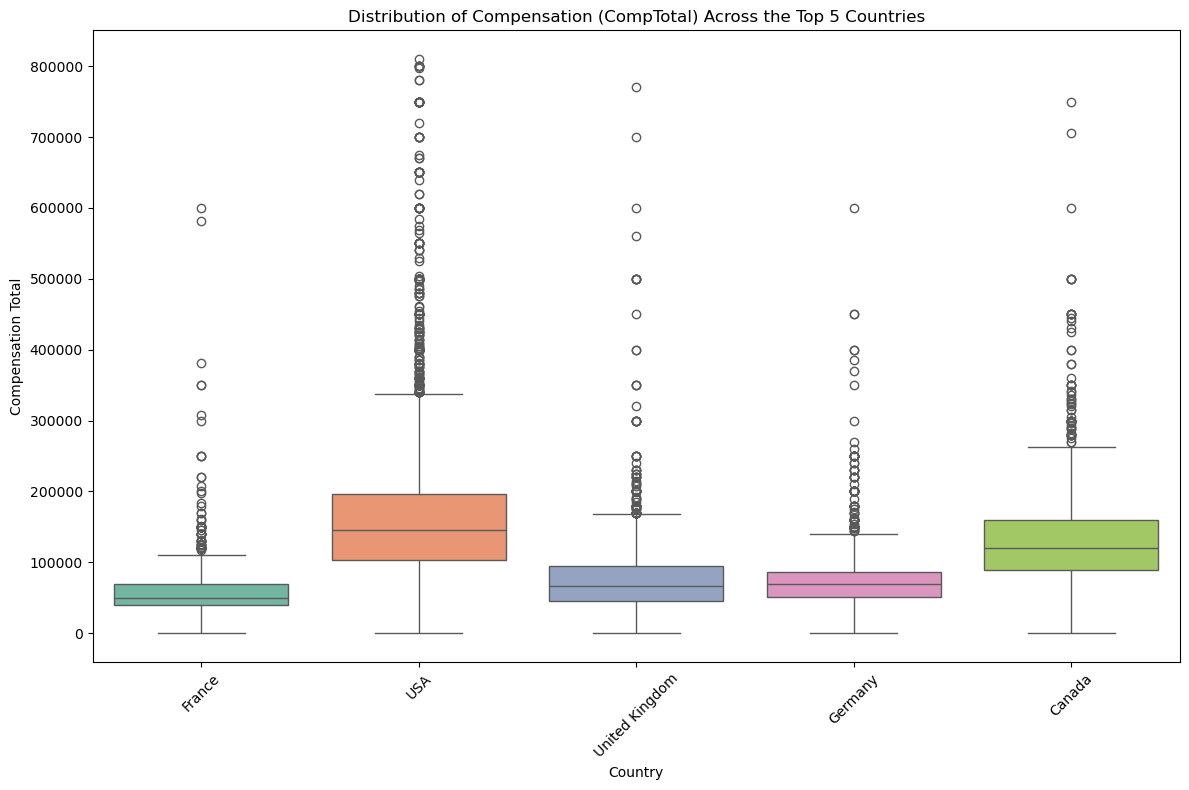

In [48]:

df_no_outliers['Country'] = df_no_outliers['Country'].replace({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
})

# Filter out missing values in 'Country' and 'CompTotal'
df_filtered = df_no_outliers[df_no_outliers['Country'].notna() & df_no_outliers['CompTotal'].notna()]

# Get the top 5 countries with the most respondents
top_5_countries = df_filtered['Country'].value_counts().nlargest(5).index

#  Filter the dataset to only include the top 5 countries
df_top_5_countries = df_filtered[df_filtered['Country'].isin(top_5_countries)]

#  Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_5_countries, x='Country', y='CompTotal', palette='Set2')

#  Customize the plot
plt.title('Distribution of Compensation (CompTotal) Across the Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Compensation Total')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.tight_layout()
plt.show()


Box Plot of CompTotal Across Employment Types

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1087581036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='DevType', y='CompTotal', palette='Set2')


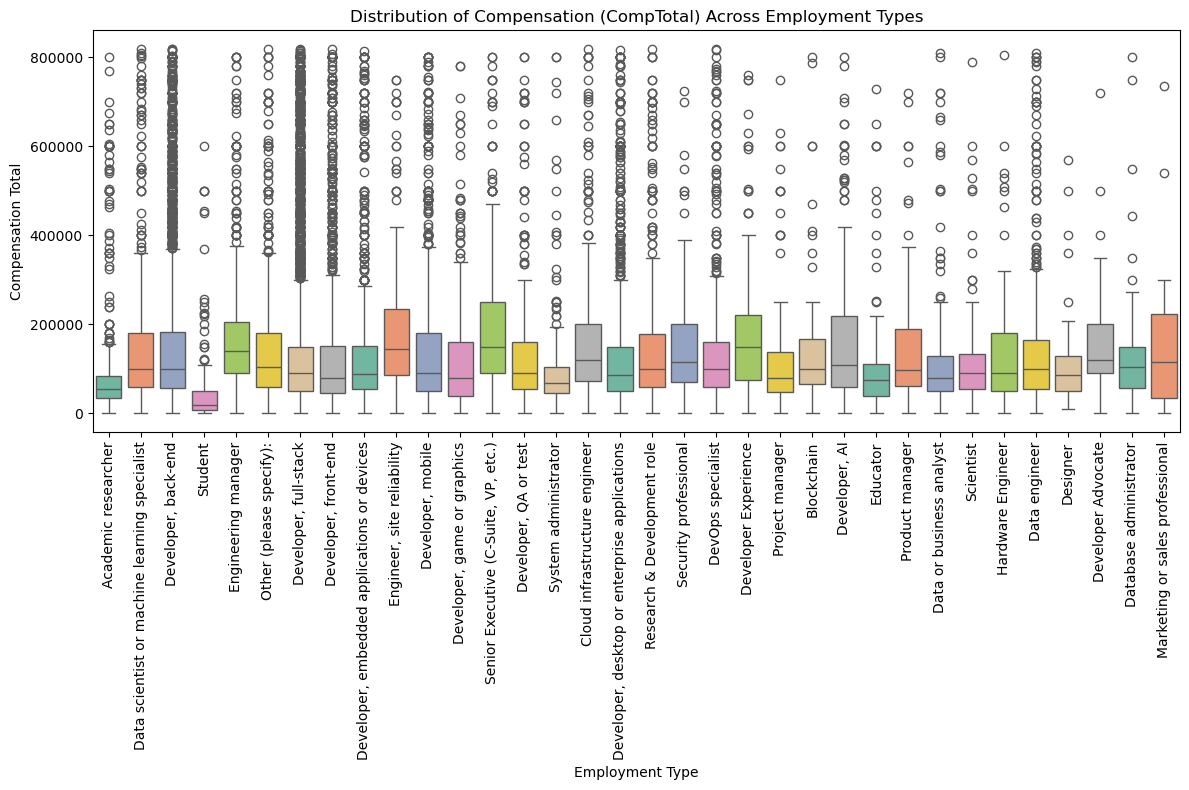

In [50]:

#Filter out missing or invalid values in 'DevType' and 'CompTotal'
df_filtered = df_no_outliers[df_no_outliers['DevType'].notna() & df_no_outliers['CompTotal'].notna()]

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='DevType', y='CompTotal', palette='Set2')

# Customize the plot
plt.title('Distribution of Compensation (CompTotal) Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Compensation Total')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.tight_layout()
plt.show()


Relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6)

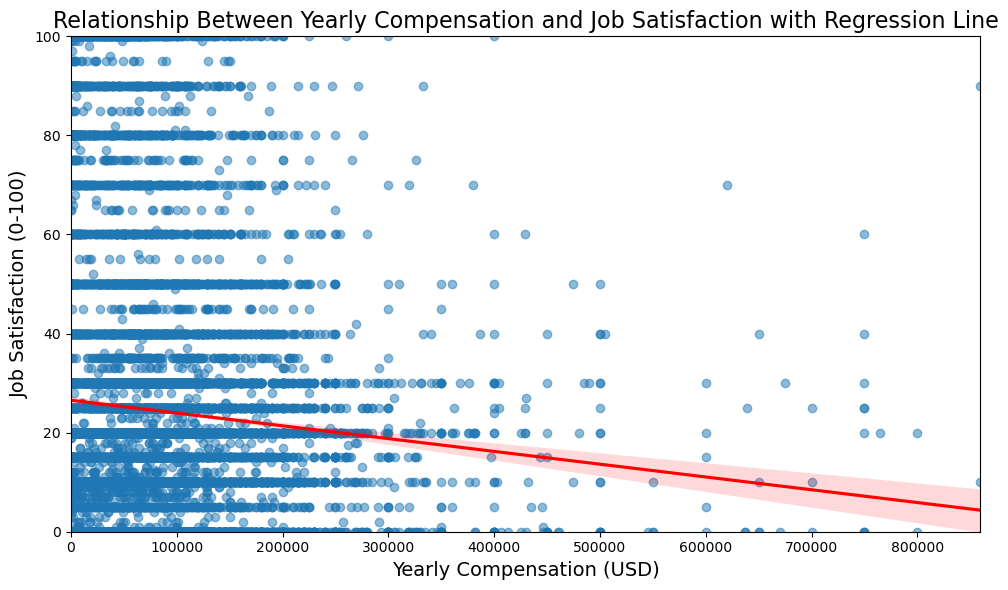

In [52]:

# Filter out rows with missing or invalid values in ConvertedCompYearly and JobSatPoints_6
df_filtered = df_no_outliers.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 1400000]  # Example: cap at $500k for visualization

# Create a scatter plot of ConvertedCompYearly vs JobSatPoints_6
plt.figure(figsize=(10, 6))
sns.regplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df_filtered, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Relationship Between Yearly Compensation and Job Satisfaction with Regression Line', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (0-100)', fontsize=14)
plt.xlim(0, df_filtered['ConvertedCompYearly'].max()) 
plt.ylim(0, df_filtered['JobSatPoints_6'].max()) 

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/3190692754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_numeric'] = df_no_outliers['Age'].map(age_mapping)
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/3190692754.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=['Age_numeric'], inplace=True)


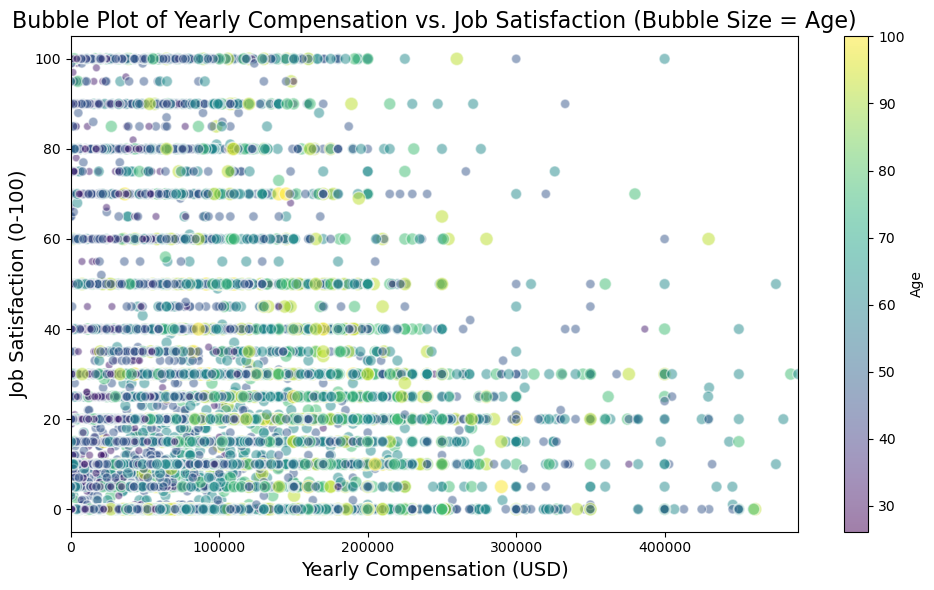

In [54]:

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None
}

# Apply the mapping to the 'Age' column
df_no_outliers['Age_numeric'] = df_no_outliers['Age'].map(age_mapping)

# Drop rows with missing or 'Prefer not to say' ages
df_no_outliers.dropna(subset=['Age_numeric'], inplace=True)

#  Filter the data (as before)
df_filtered = df_no_outliers.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 500000]  # Optional: Cap at $500k

# Normalize the Age to use it as the size for bubbles
age_scaled = df_filtered['Age_numeric'] / df_filtered['Age_numeric'].max() * 100  # Scale for bubble size

# Create a bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['ConvertedCompYearly'], df_filtered['JobSatPoints_6'], 
            s=age_scaled, alpha=0.5, c=age_scaled, cmap='viridis', edgecolor='w')

# Customize the plot
plt.title('Bubble Plot of Yearly Compensation vs. Job Satisfaction (Bubble Size = Age)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (0-100)', fontsize=14)
plt.colorbar(label='Age')  # Add a color bar to represent the Age scale
plt.xlim(0, df_filtered['ConvertedCompYearly'].max())  # Adjust the x-axis limit

# Display the plot
plt.tight_layout()
plt.show()


Popularity of programming languages (LanguageHaveWorkedWith) against job satisfaction using a scatter plot.

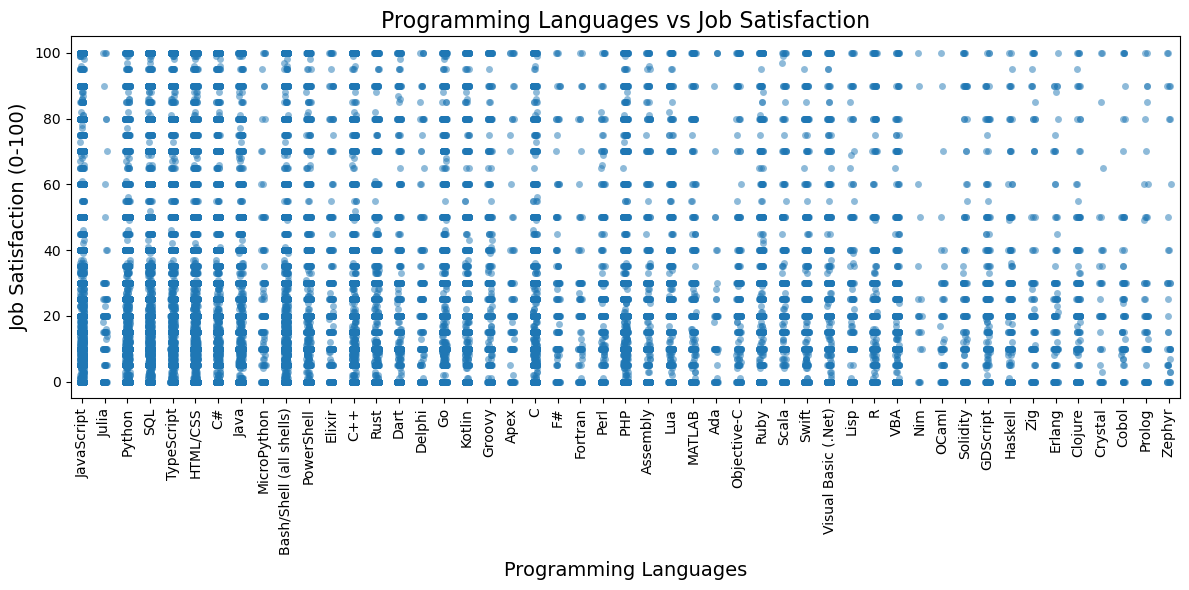

In [56]:

# Split the 'LanguageHaveWorkedWith' into individual languages safely using .loc
df_exploded = df_filtered.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()  # Copy to avoid modifying the original DataFrame
df_exploded.loc[:, 'LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('LanguageHaveWorkedWith')

# Plot the scatter plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='LanguageHaveWorkedWith', y='JobSatPoints_6', data=df_exploded, jitter=True, alpha=0.5)

# Customize the plot
plt.title('Programming Languages vs Job Satisfaction', fontsize=16)
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Job Satisfaction (0-100)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()


Relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6), categorized by employment type (Employment).

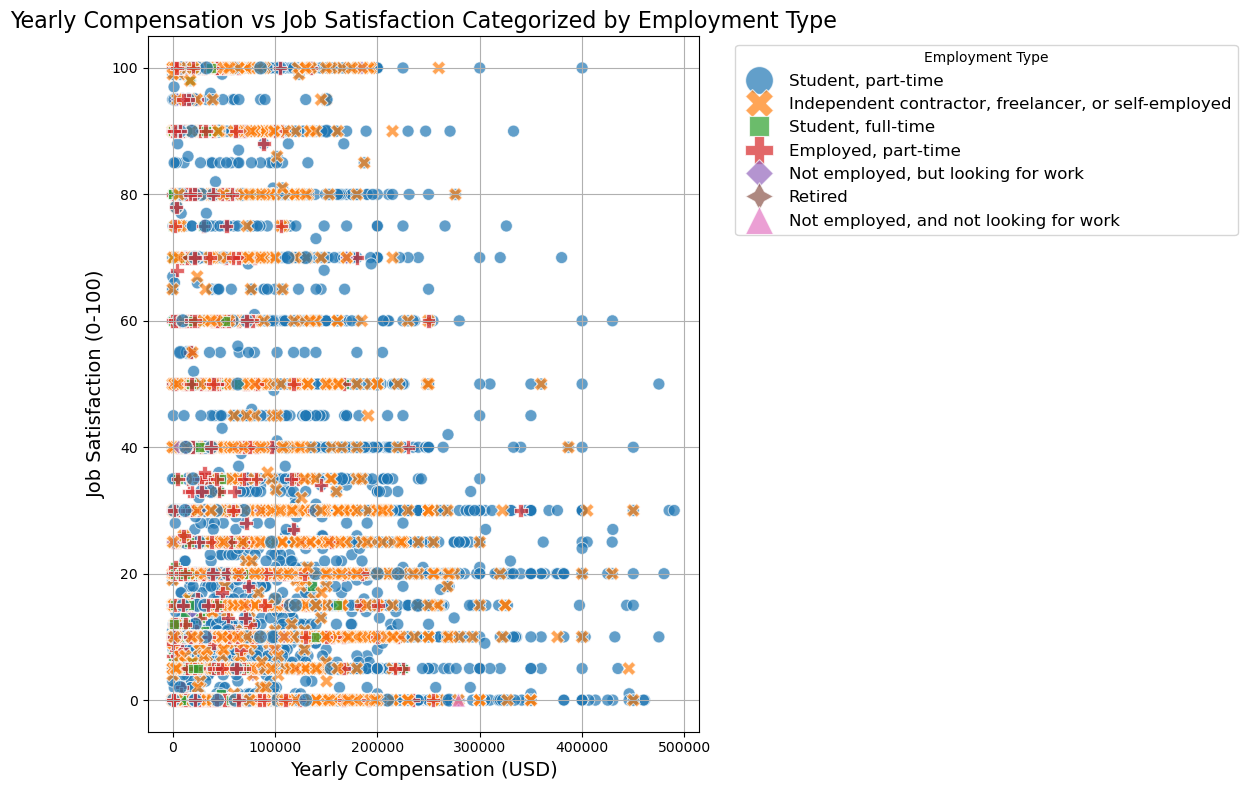

In [58]:

#  Convert 'Employment' column to string format and then split by ';'
df_exploded = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()  # Copy to avoid modifying the original DataFrame
df_exploded['Employment'] = df_exploded['Employment'].astype(str).str.split(';')  # Convert to string before splitting
df_exploded = df_exploded.explode('Employment')

# Create the base scatter plot with 'Employed, full-time' plotted first for layering
plt.figure(figsize=(12, 8))

# Plot 'Employed, full-time' first with smaller size and more transparency
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment', 
                style='Employment', data=df_exploded[df_exploded['Employment'] == 'Employed, full-time'], 
                alpha=0.7, s=75, legend=False)  # Lower alpha for transparency and smaller size

# Plot all other Employment types with default size and full opacity
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment', 
                style='Employment', data=df_exploded[df_exploded['Employment'] != 'Employed, full-time'], 
                alpha=0.7, s=100)



# Customize the plot
plt.title('Yearly Compensation vs Job Satisfaction Categorized by Employment Type', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (0-100)', fontsize=14)
plt.xscale('linear')  # Keep a linear scale for better readability of the compensation range

plt.legend(title='Employment Type', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Chart to show the distribution of Employment Type

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/3876807140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_counts.index, y=employment_counts.values, palette='Set2')


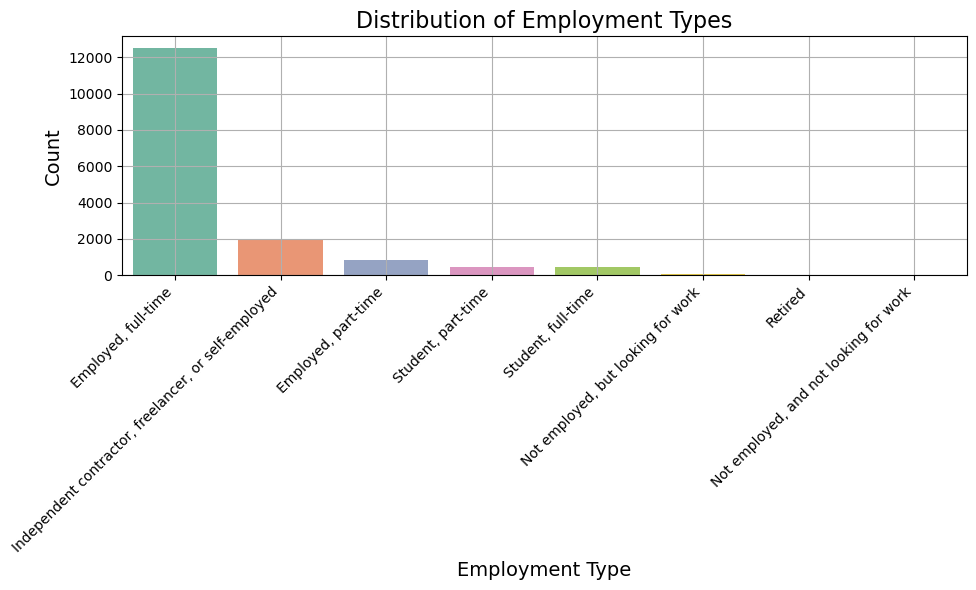

In [60]:

# Explode 'Employment' column if not done already
df_exploded = df_filtered.dropna(subset=['Employment']).copy()  # Drop NaN values from 'Employment' column
df_exploded['Employment'] = df_exploded['Employment'].astype(str).str.split(';')  # Convert to string and split
df_exploded = df_exploded.explode('Employment')  # Explode the column

# Count the occurrences of each Employment type
employment_counts = df_exploded['Employment'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_counts.index, y=employment_counts.values, palette='Set2')

# Customize the plot
plt.title('Distribution of Employment Types', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Distribution of employment types within each job satisfaction level using a stacked chart.

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1856647681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['JobSat'] = df_filtered_clean['JobSat'].astype(int)
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1856647681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['Employment'] = df_filtered_clean['Employment'].str.split(';')


<Figure size 1200x800 with 0 Axes>

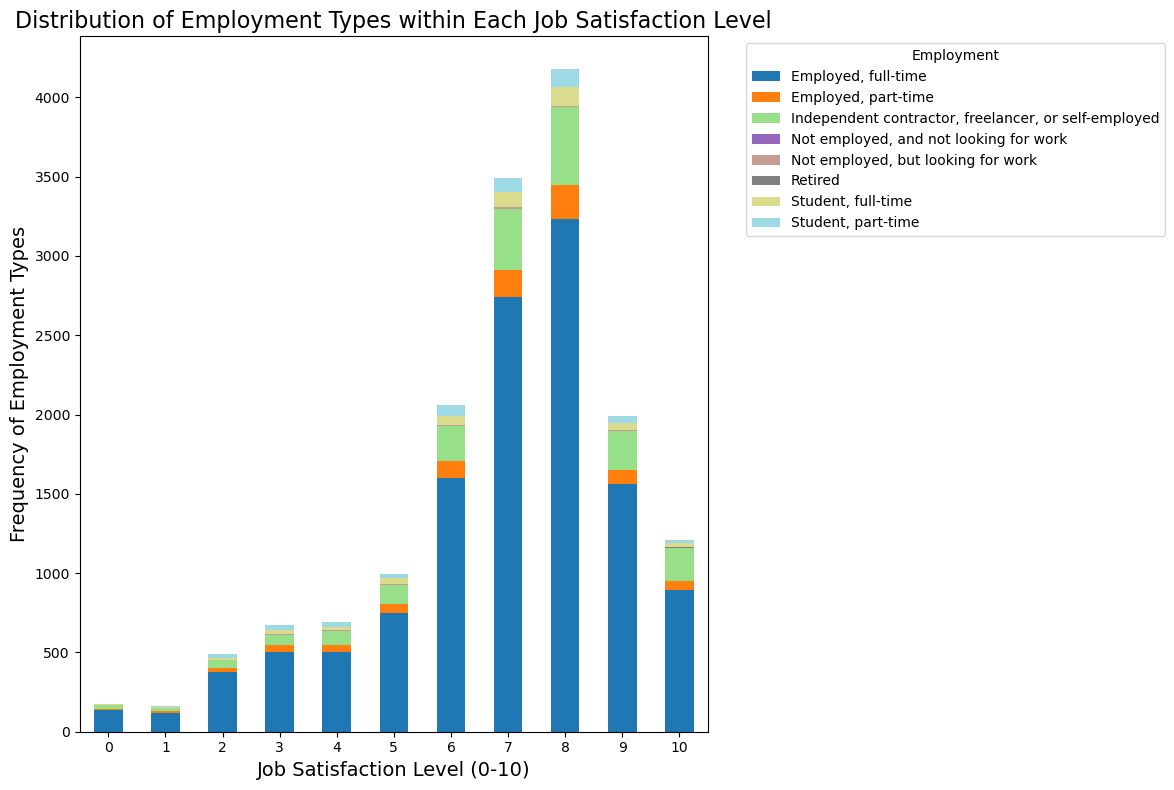

In [62]:

# Clean the data (remove rows with missing values in 'Employment' and 'JobSat')
df_filtered_clean = df_filtered.dropna(subset=['Employment', 'JobSat'])

# Convert 'JobSat' to integer if necessary
df_filtered_clean['JobSat'] = df_filtered_clean['JobSat'].astype(int)

# Split 'Employment' by ';' and explode the values to handle multiple employment types
df_filtered_clean['Employment'] = df_filtered_clean['Employment'].str.split(';')
df_exploded = df_filtered_clean.explode('Employment')

# Group the data by 'JobSat' and 'Employment' to get frequency counts
employment_job_sat_freq = df_exploded.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart with 'JobSat' on the x-axis and 'Employment' on the y-axis
employment_job_sat_freq.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

# Customize the chart
plt.title('Distribution of Employment Types within Each Job Satisfaction Level', fontsize=16)
plt.xlabel('Job Satisfaction Level (0-10)', fontsize=14)
plt.ylabel('Frequency of Employment Types', fontsize=14)
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


Work experience (YearsCodePro) across different age groups (Age) and countries (Country)

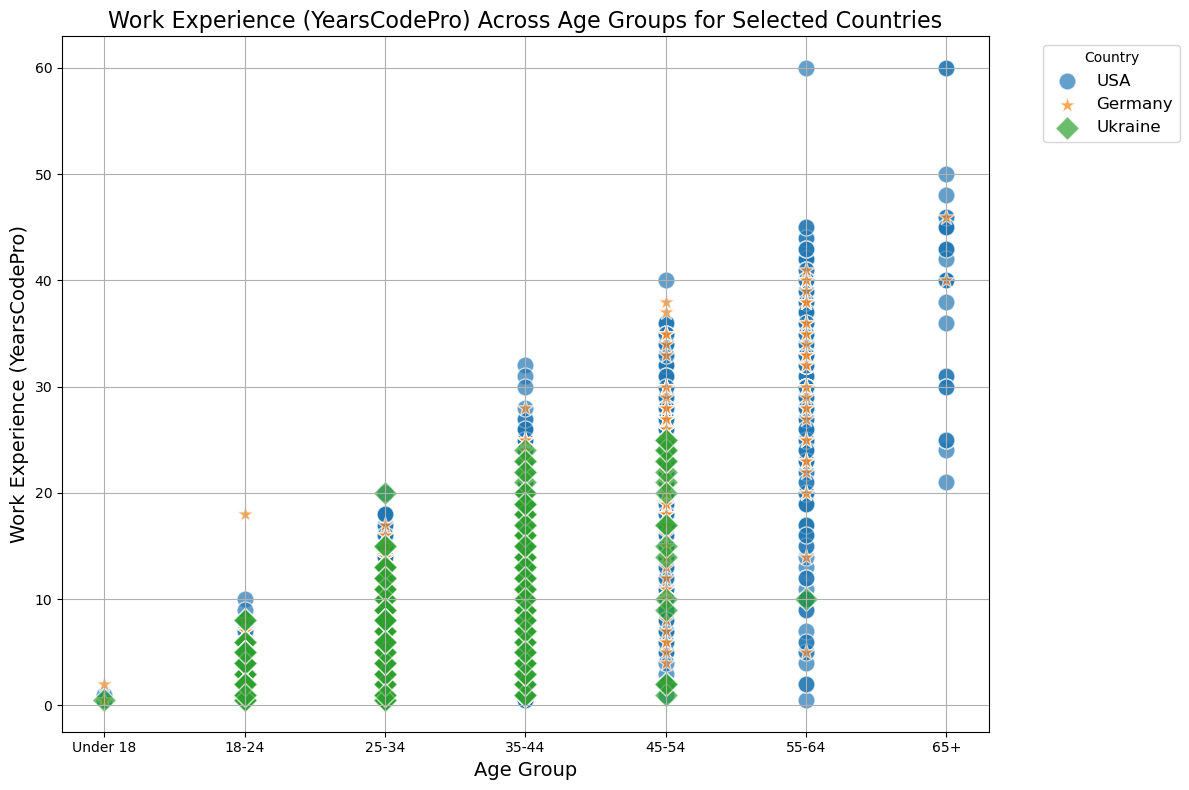

In [66]:

# Example age groups mapping (you can adjust based on your data)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None
}

# Apply the mapping to the 'Age' column and create a new numeric column
df_filtered['Age_numeric'] = df_filtered['Age'].map(age_mapping)

# Define bins for Age groups
bins = [1, 18, 24, 34, 44, 54, 64, 100]  # Adjust these bins as needed
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Corresponding labels for the bins

# Use the numeric 'Age_numeric' column for creating age groups
df_filtered['AgeGroup'] = pd.cut(df_filtered['Age_numeric'], bins=bins, labels=labels, right=False)

#  Define bins for YearsCodePro (work experience)
bins_exp = [0, 1, 5, 10, 20, 30, 49, 100]  # Adjust the bins based on your needs
labels_exp = ['0-1 years', '2-5 years', '6-10 years', '11-20 years', '21-30 years', '31-49 years', '50+ years']

# Convert 'YearsCodePro' to numeric (with previously defined mapping)
years_code_pro_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 60,
}

# Convert the 'YearsCodePro' values to numeric, using the mapping for non-numeric entries
df_filtered['YearsCodePro_numeric'] = df_filtered['YearsCodePro'].replace(years_code_pro_mapping)

# For the other numeric years, convert them directly to integers
df_filtered['YearsCodePro_numeric'] = pd.to_numeric(df_filtered['YearsCodePro_numeric'], errors='coerce')

# Bin the 'YearsCodePro_numeric' column
df_filtered['YearsCodePro_binned'] = pd.cut(df_filtered['YearsCodePro_numeric'], bins=bins_exp, labels=labels_exp, right=False)

# Count the number of occurrences for each country and get the top 1 country (focus on one country)
top_countries = df_filtered['Country'].value_counts().nlargest(2).index

#  Filter the dataset to include only the selected country
countries_of_interest = ['USA','Germany', 'Ukraine' ]  # Modify this list with the countries you want

# Ensure the list has at most 5 countries
countries_of_interest = countries_of_interest[:5]

# Filter the dataset to include only the countries of interest
df_filtered_countries = df_filtered[df_filtered['Country'].isin(countries_of_interest)]

# Filter out rows with missing 'YearsCodePro' and 'AgeGroup'
df_filtered_countries = df_filtered_countries.dropna(subset=['YearsCodePro_numeric', 'AgeGroup', 'Country'])

#Define a set of markers (we'll use a maximum of 5 unique markers)
available_markers = ["o", "*", "D", "^", "s"]  # Circle, square, diamond, triangle up, triangle down

# Create a mapping of countries to different markers
country_markers = {country: available_markers[i] for i, country in enumerate(countries_of_interest)}

#  Create the scatter plot with age groups, work experience, and countries
plt.figure(figsize=(12, 8))

# Use a loop to plot each country separately
for country in countries_of_interest:
    sns.scatterplot(x='AgeGroup', y='YearsCodePro_numeric', 
                    data=df_filtered_countries[df_filtered_countries['Country'] == country], 
                    label=country, marker=country_markers[country], s=150, alpha=0.7)

# Customize the plot
plt.title('Work Experience (YearsCodePro) Across Age Groups for Selected Countries', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Work Experience (YearsCodePro)', fontsize=14)

# Show only the country names in the legend
plt.legend(title='Country', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



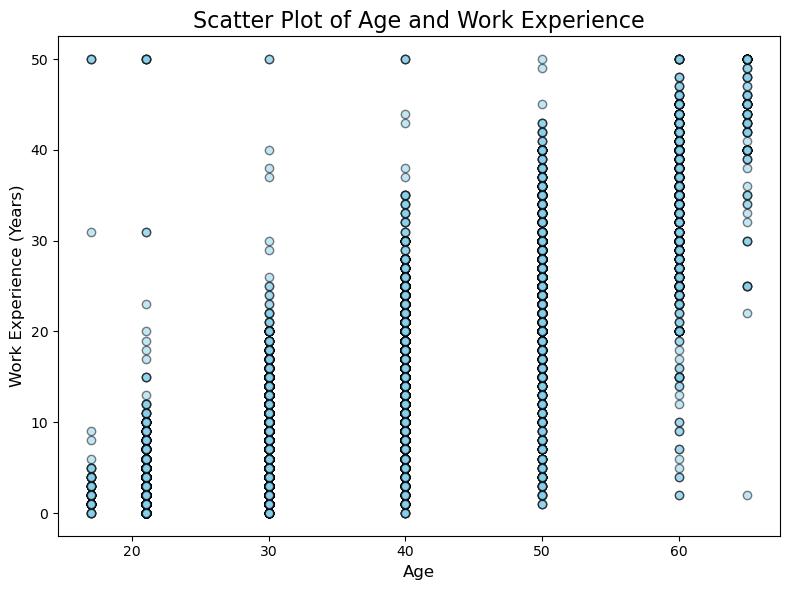

In [76]:

#  Query the 'Age' column from the 'main' table
query = "SELECT Age, WorkExp FROM main"
df = pd.read_sql_query(query, conn)

#  Map the categorical age values to approximate numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None
}

# Apply the mapping to the 'Age' column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing or 'Prefer not to say' ages
df.dropna(subset=['Age_numeric','WorkExp'], inplace=True)

df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
df.dropna(subset=['WorkExp'], inplace=True)

#Plot the box plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age_numeric'], df['WorkExp'], alpha=0.5, color='skyblue', edgecolors='black')

# Add labels and title
plt.title('Scatter Plot of Age and Work Experience', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


Bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


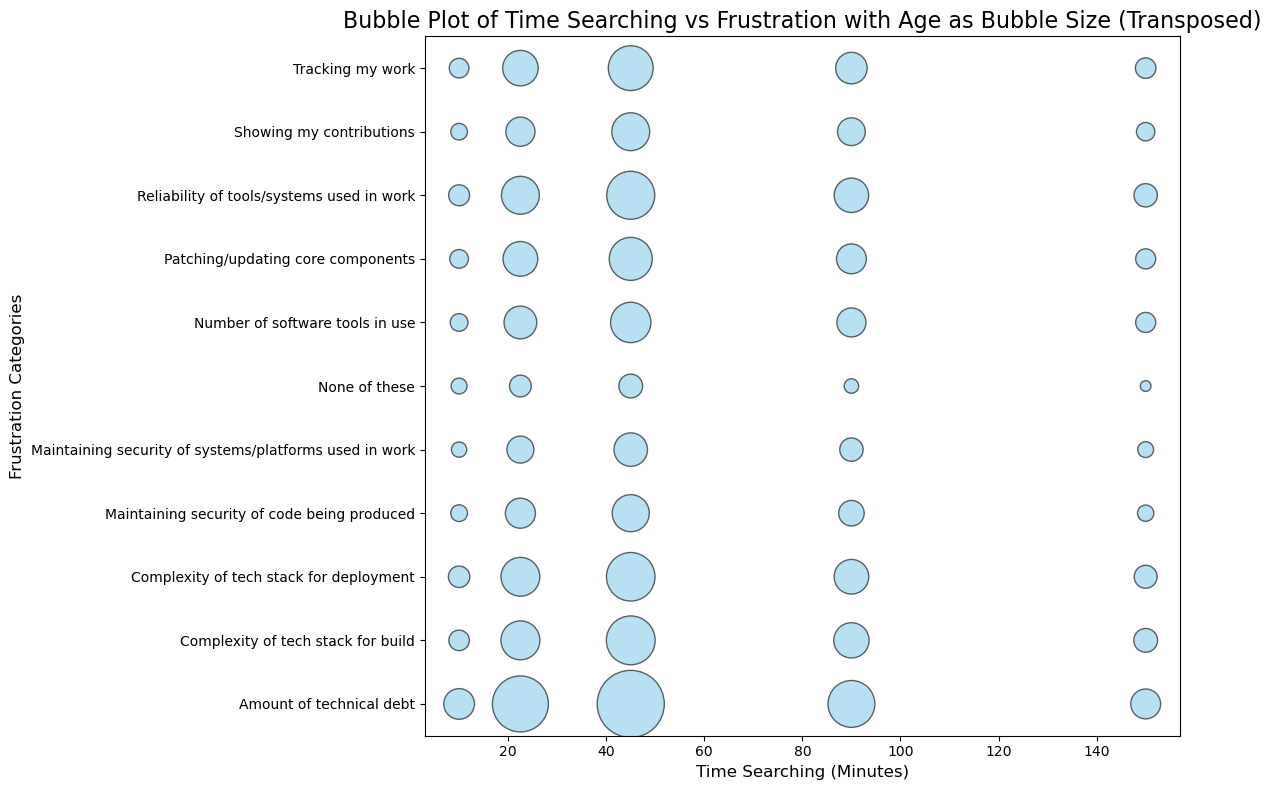

In [78]:
#  Query the 'TimeSearching', 'Frustration', and 'Age' columns from the 'main' table
query = "SELECT TimeSearching, Frustration, Age FROM main"
df = pd.read_sql_query(query, conn)

#  Map the 'TimeSearching' and 'Age' values to approximate numeric values
time_searching_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,
    None: None  # Handle missing values
}

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None  # Exclude 'Prefer not to say'
}

# Apply the mapping to the 'TimeSearching' and 'Age' columns
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_searching_mapping)
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in 'TimeSearching_numeric' or 'Age_numeric'
df.dropna(subset=['TimeSearching_numeric', 'Age_numeric'], inplace=True)

#  Split 'Frustration' into separate categories
df['Frustration_split'] = df['Frustration'].str.split(';')

# Explode the list of frustrations into individual rows
df_exploded = df.explode('Frustration_split')

#  Group by 'TimeSearching_numeric' and 'Frustration_split' to get counts
frustation_time_searching_counts = df_exploded.groupby(['TimeSearching_numeric', 'Frustration_split']).size().unstack(fill_value=0)

# Reset the index for easier plotting
frustation_time_searching_counts = frustation_time_searching_counts.reset_index()

#  Prepare data for plotting the bubble chart
# Flatten the counts into a DataFrame suitable for plotting
df_bubble = frustation_time_searching_counts.melt(id_vars=['TimeSearching_numeric'], 
                                                  var_name='Frustration_split', 
                                                  value_name='Count')

# Map the Age_numeric to bubble sizes
df_bubble['Bubble_size'] = (df['Age_numeric'].mean() * df_bubble['Count']) / 100  # Scaling the size by dividing by 100

# Plot the bubble chart (transpose by swapping x and y)
plt.figure(figsize=(12, 8))

# Scatter plot: x = Time spent searching, y = Frustration categories, size = Age-based bubble size
plt.scatter(df_bubble['TimeSearching_numeric'], df_bubble['Frustration_split'], 
            s=df_bubble['Bubble_size'], alpha=0.6, color='skyblue', edgecolors='black')

# Add labels and title
plt.title('Bubble Plot of Time Searching vs Frustration with Age as Bubble Size (Transposed)', fontsize=16)
plt.xlabel('Time Searching (Minutes)', fontsize=12)
plt.ylabel('Frustration Categories', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()




Bubble Plot for Collaboration Tools by Age

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/519795514.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['NEWCollabToolsHaveWorkedWith'] = df_filtered_clean['NEWCollabToolsHaveWorkedWith'].apply(


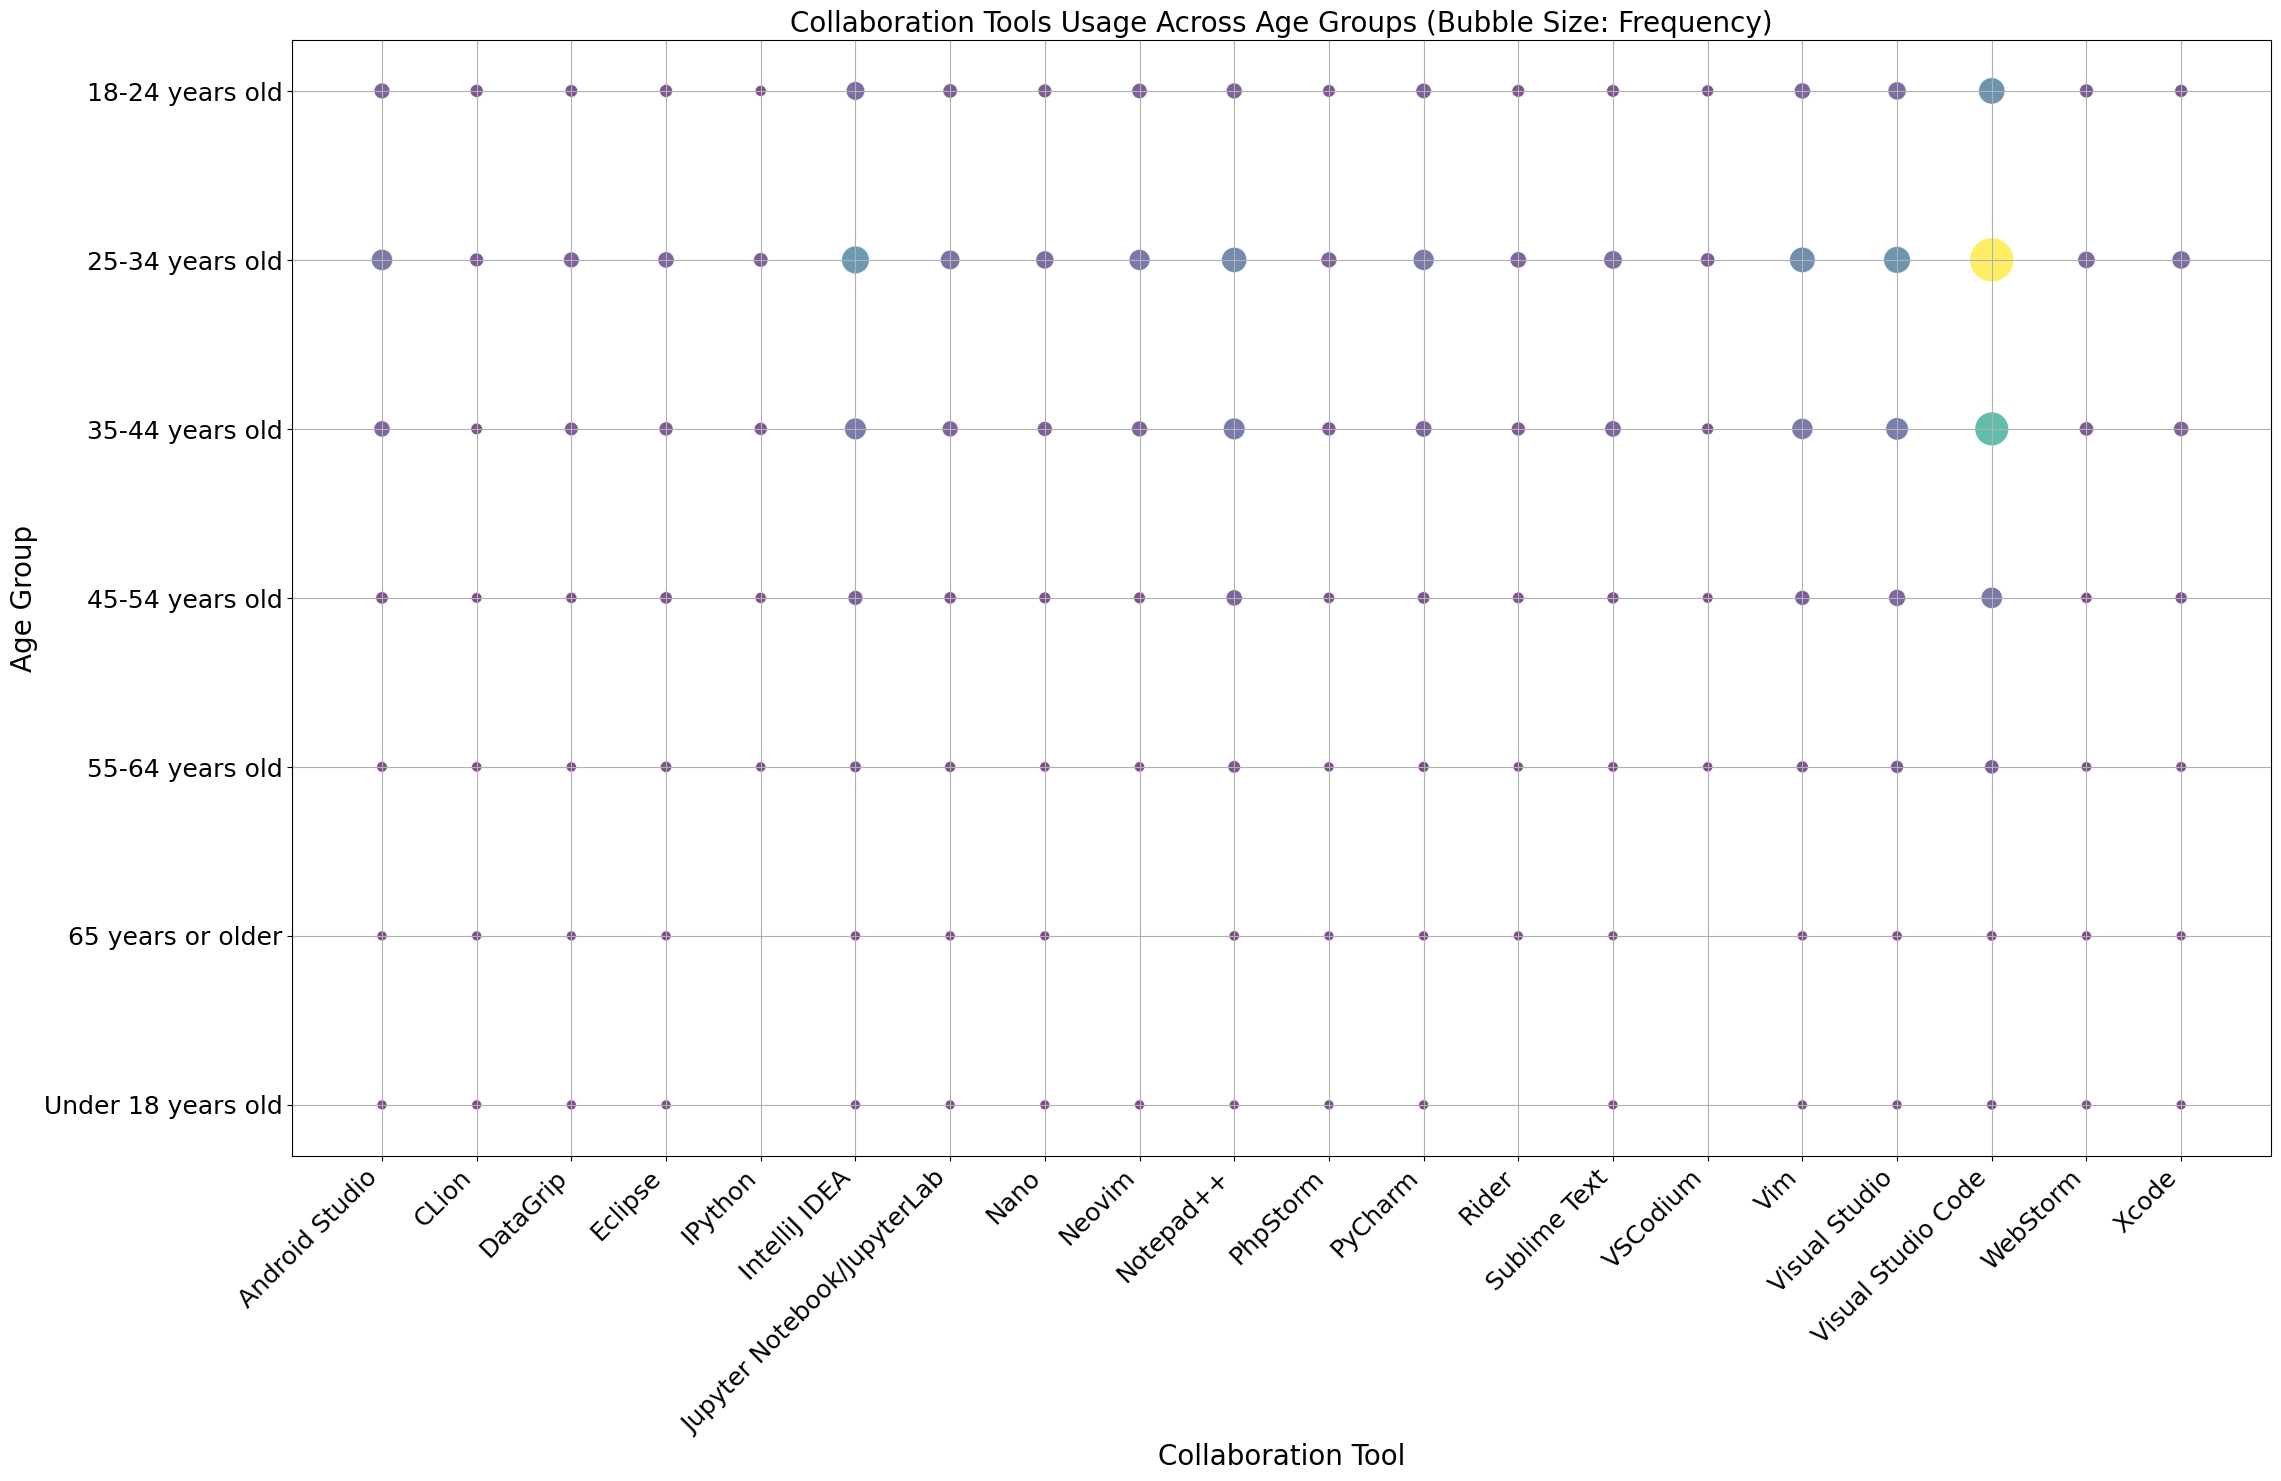

In [84]:

# Clean the data (remove rows with missing values in 'NEWCollabToolsHaveWorkedWith' and 'Age')
df_filtered_clean = df_filtered.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Split the 'NEWCollabToolsHaveWorkedWith' column by ';' and count the frequency of each tool
tools_split = df_filtered_clean['NEWCollabToolsHaveWorkedWith'].str.split(';', expand=True).stack()
tools_count = tools_split.value_counts()

# Get the top 20 most frequent collaboration tools
top_20_tools = tools_count.head(20).index.tolist()

# Filter the dataset to include only the top 20 tools
df_filtered_clean['NEWCollabToolsHaveWorkedWith'] = df_filtered_clean['NEWCollabToolsHaveWorkedWith'].apply(
    lambda x: [tool for tool in x.split(';') if tool in top_20_tools]
)

# Count the frequency of collaboration tools by age group, keeping only the top 20 tools
collab_tools_freq = df_filtered_clean.explode('NEWCollabToolsHaveWorkedWith').groupby(
    ['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Create the bubble plot
plt.figure(figsize=(24, 16))

# Use Age for y-axis, NEWCollabToolsHaveWorkedWith for x-axis, and Frequency for bubble size
sns.scatterplot(x='NEWCollabToolsHaveWorkedWith', y='Age', size='Frequency', sizes=(50, 1000),
                data=collab_tools_freq, alpha=0.7, hue='Frequency', palette='viridis', legend=False)

# Customize the plot
plt.title('Collaboration Tools Usage Across Age Groups (Bubble Size: Frequency)', fontsize=20)
plt.xlabel('Collaboration Tool', fontsize=20)
plt.ylabel('Age Group', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Rotate x-axis labels and adjust the margins for better fit
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25, left=0.1)  # Increase the bottom and left margin for more space
plt.grid(True)

# Display the plot with more padding in the layout
plt.tight_layout(pad=5.0)  # Increase the padding for better spacing
plt.show()



Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction
Explore the relationship between preferred web frameworks (WebframeWantToWorkWith) and job satisfaction.

Use bubble size to represent the number of respondents.

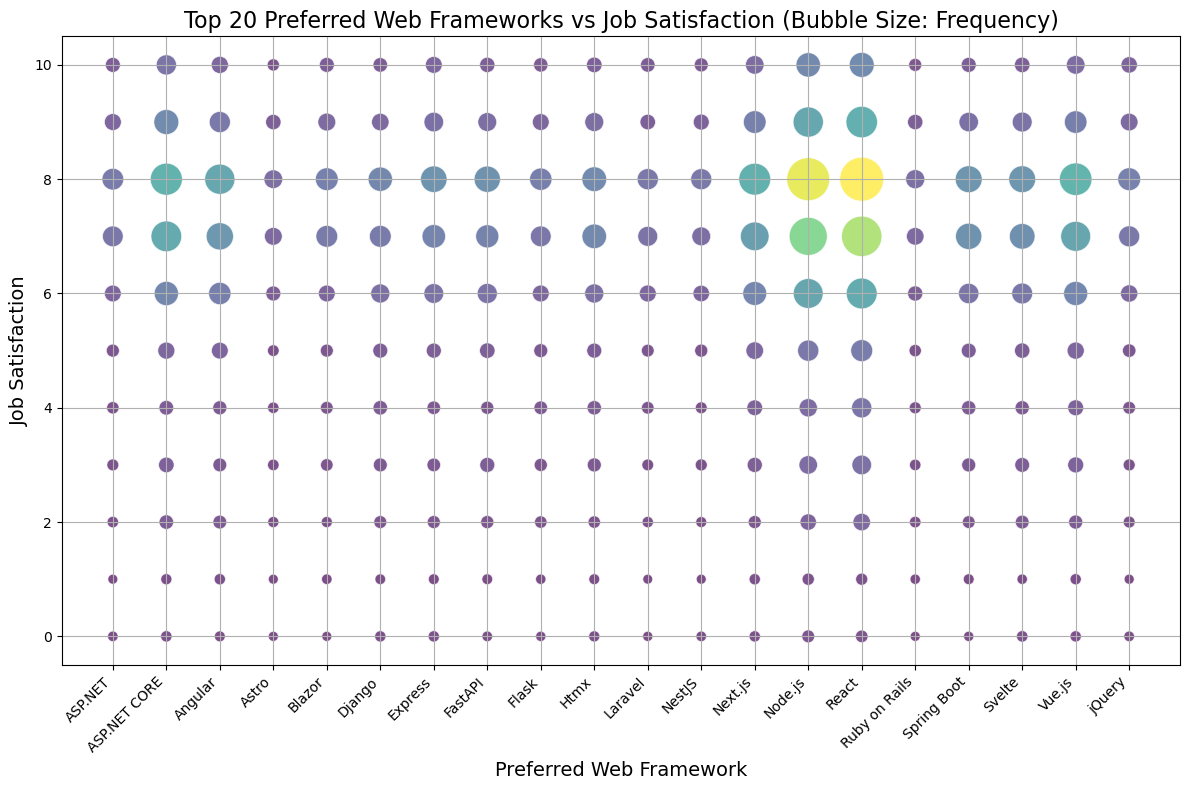

In [86]:

# Clean the data (remove rows with missing values in 'WebframeWantToWorkWith' and 'JobSat')
df_filtered_clean = df_filtered.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

#  Split 'WebframeWantToWorkWith' by ';' and explode into separate rows
df_exploded = df_filtered_clean.assign(WebframeWantToWorkWith=df_filtered_clean['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

#  Count the frequency of each web framework
webframe_freq = df_exploded['WebframeWantToWorkWith'].value_counts().reset_index(name='Frequency')
webframe_freq.columns = ['WebframeWantToWorkWith', 'Frequency']

#  Filter the top 20 most popular frameworks
top_20_webframes = webframe_freq.head(20)

#  Filter the original data to include only the top 20 web frameworks
df_exploded_top20 = df_exploded[df_exploded['WebframeWantToWorkWith'].isin(top_20_webframes['WebframeWantToWorkWith'])]

# Count the frequency of web frameworks and job satisfaction combinations
webframe_jobsat_freq = df_exploded_top20.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Use WebframeWantToWorkWith for x-axis, JobSat for y-axis, and Frequency for bubble size
sns.scatterplot(x='WebframeWantToWorkWith', y='JobSat', size='Frequency', sizes=(50, 1000),
                data=webframe_jobsat_freq, alpha=0.7, hue='Frequency', palette='viridis', legend=False)

# Customize the plot
plt.title('Top 20 Preferred Web Frameworks vs Job Satisfaction (Bubble Size: Frequency)', fontsize=16)
plt.xlabel('Preferred Web Framework', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to accommodate rotated labels

# Optional: Add grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Bubble Plot for Admired Technologies Across Countries

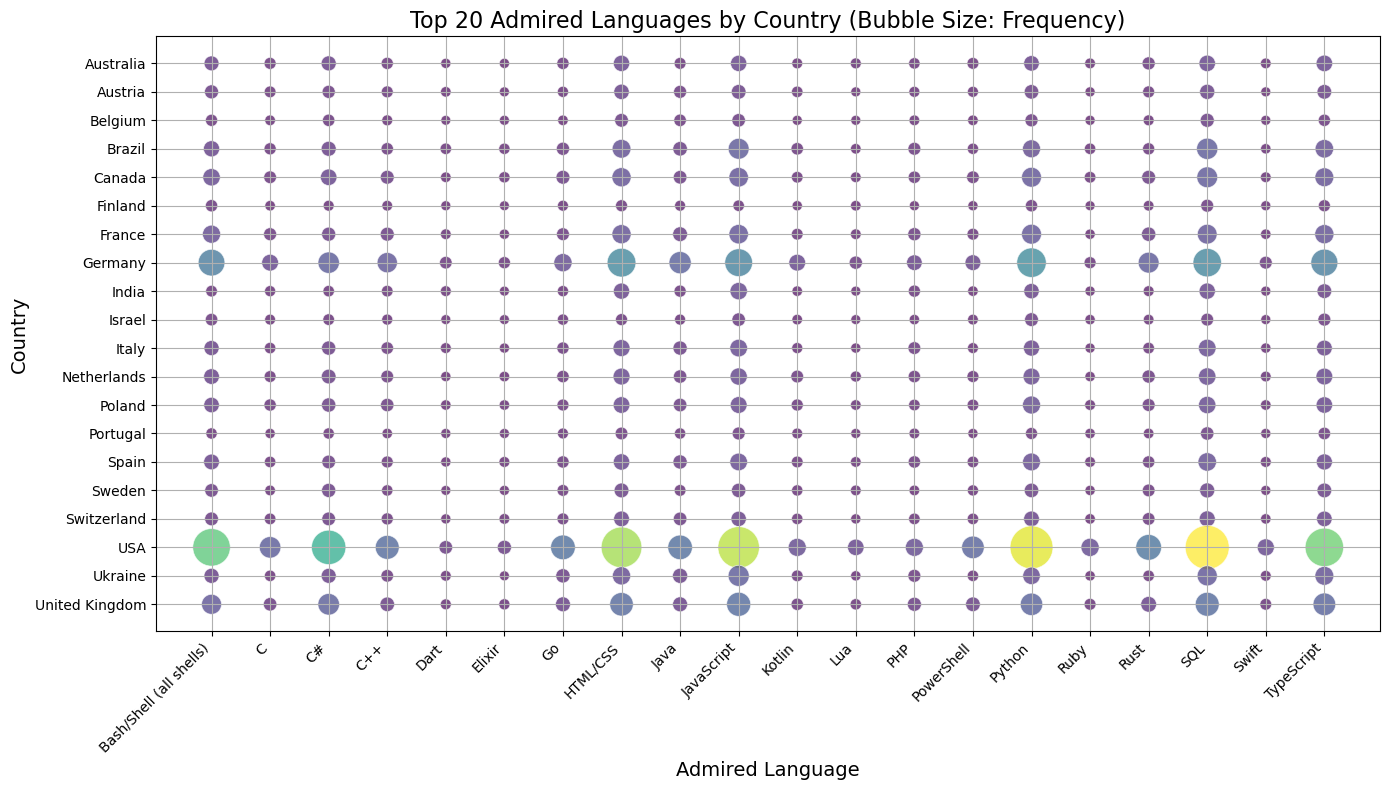

In [88]:

# Clean the data (remove rows with missing values in 'LanguageAdmired' and 'Country')
df_filtered_clean = df_filtered.dropna(subset=['LanguageAdmired', 'Country'])

# Split 'LanguageAdmired' by ';' and explode into separate rows
df_exploded = df_filtered_clean.assign(LanguageAdmired=df_filtered_clean['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Count the frequency of each admired language
language_freq = df_exploded['LanguageAdmired'].value_counts().reset_index(name='Frequency')
language_freq.columns = ['LanguageAdmired', 'Frequency']

# Filter the top 20 most admired languages
top_20_languages = language_freq.head(20)

# Filter the original data to include only the top 20 admired languages
df_exploded_top20 = df_exploded[df_exploded['LanguageAdmired'].isin(top_20_languages['LanguageAdmired'])]

# Get the top 20 countries by frequency of respondents
top_20_countries = df_filtered['Country'].value_counts().head(20).index

# Filter the data to include only the top 20 countries
df_exploded_top20_countries = df_exploded_top20[df_exploded_top20['Country'].isin(top_20_countries)]

# Count the frequency of admired languages by country
language_country_freq = df_exploded_top20_countries.groupby(['LanguageAdmired', 'Country']).size().reset_index(name='Frequency')

# Create the bubble plot
plt.figure(figsize=(14, 8))

# Use LanguageAdmired for x-axis, Country for y-axis, and Frequency for bubble size
sns.scatterplot(x='LanguageAdmired', y='Country', size='Frequency', sizes=(50, 1000),
                data=language_country_freq, alpha=0.7, hue='Frequency', palette='viridis', legend=False)

# Customize the plot
plt.title('Top 20 Admired Languages by Country (Bubble Size: Frequency)', fontsize=16)
plt.xlabel('Admired Language', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to accommodate rotated labels
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


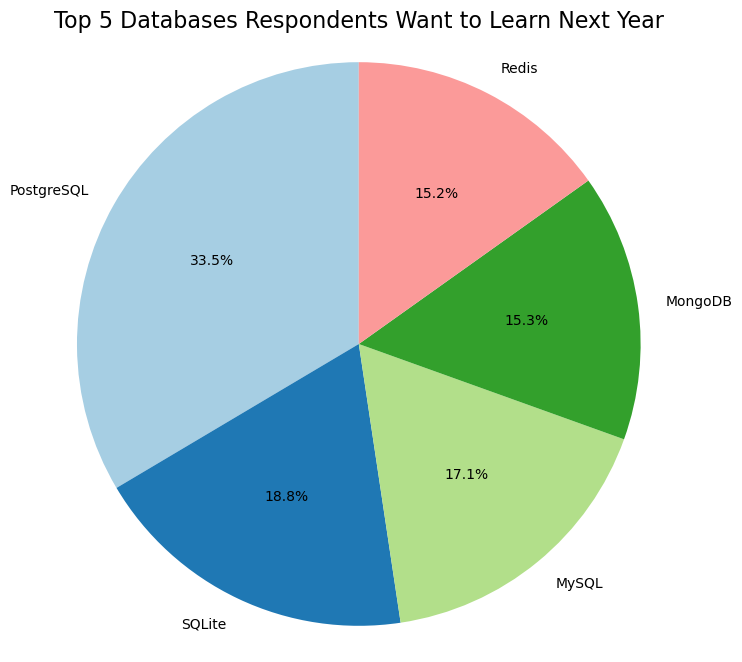

In [90]:

# Query the data from SQL table
query = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(query, conn)

# Split the 'DatabaseWantToWorkWith' column by ';'
df['Database_split'] = df['DatabaseWantToWorkWith'].str.split(';')

# Explode the list into individual rows
df_exploded = df.explode('Database_split')

# Count the occurrences of each database
database_counts = df_exploded['Database_split'].value_counts()

# Select the top 5 most frequent databases
top_5_databases = database_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/4250391659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['DatabaseWantToWorkWith'] = df_filtered_clean['DatabaseWantToWorkWith'].str.split(';')


<Figure size 1200x800 with 0 Axes>

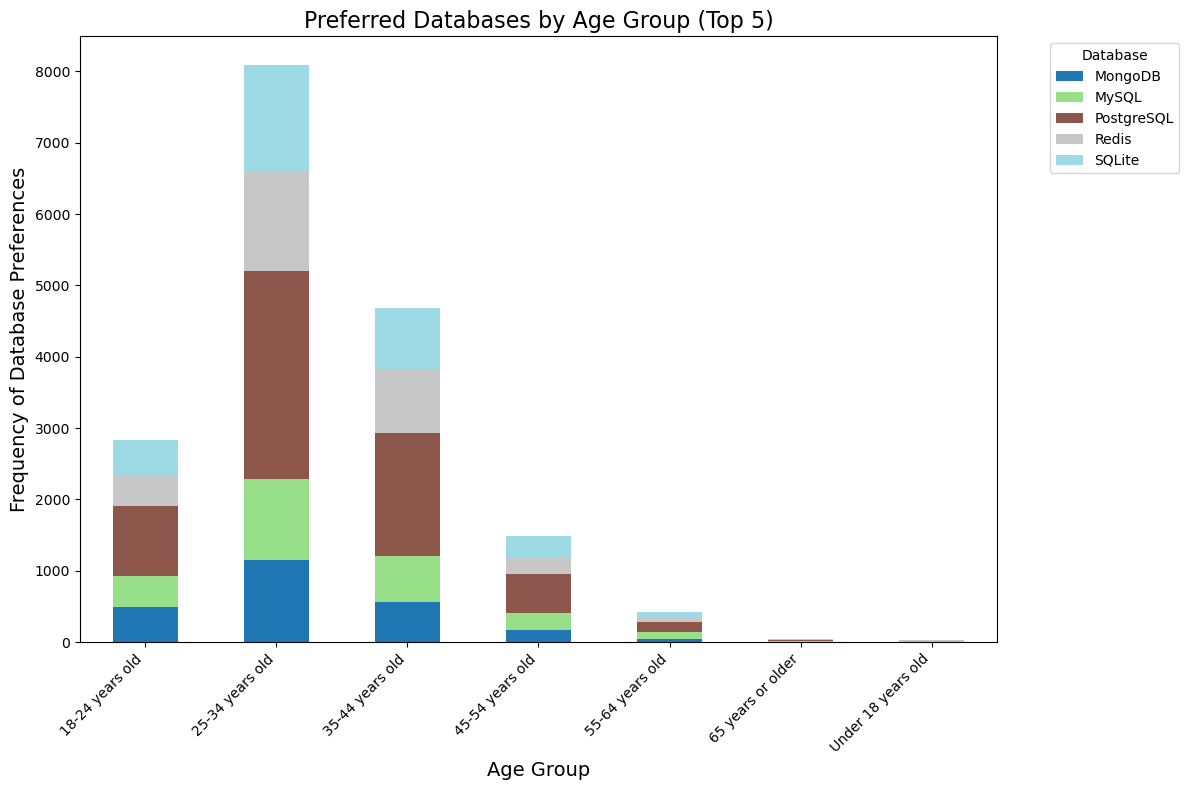

In [92]:

# Remove rows with missing values in 'DatabaseWantToWorkWith' and 'Age')
df_filtered_clean = df_filtered.dropna(subset=['DatabaseWantToWorkWith', 'Age'])

# Split 'DatabaseWantToWorkWith' by ';' and explode the values
df_filtered_clean['DatabaseWantToWorkWith'] = df_filtered_clean['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_filtered_clean.explode('DatabaseWantToWorkWith')

# Get the top 20 most preferred databases
top_20_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index

# Filter to include only the top 20 databases
df_top_databases = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_20_databases)]

# Group the data by 'Age' and 'DatabaseWantToWorkWith' to get the frequency counts
age_database_freq = df_top_databases.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart with 'Age' on the x-axis and 'DatabaseWantToWorkWith' on the y-axis
age_database_freq.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

# Customize the chart
plt.title('Preferred Databases by Age Group (Top 5)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Frequency of Database Preferences', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


Programming language preferences (LanguageAdmired) across age groups.

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/317610889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['LanguageAdmired'] = df_filtered_clean['LanguageAdmired'].str.split(';')


<Figure size 1200x800 with 0 Axes>

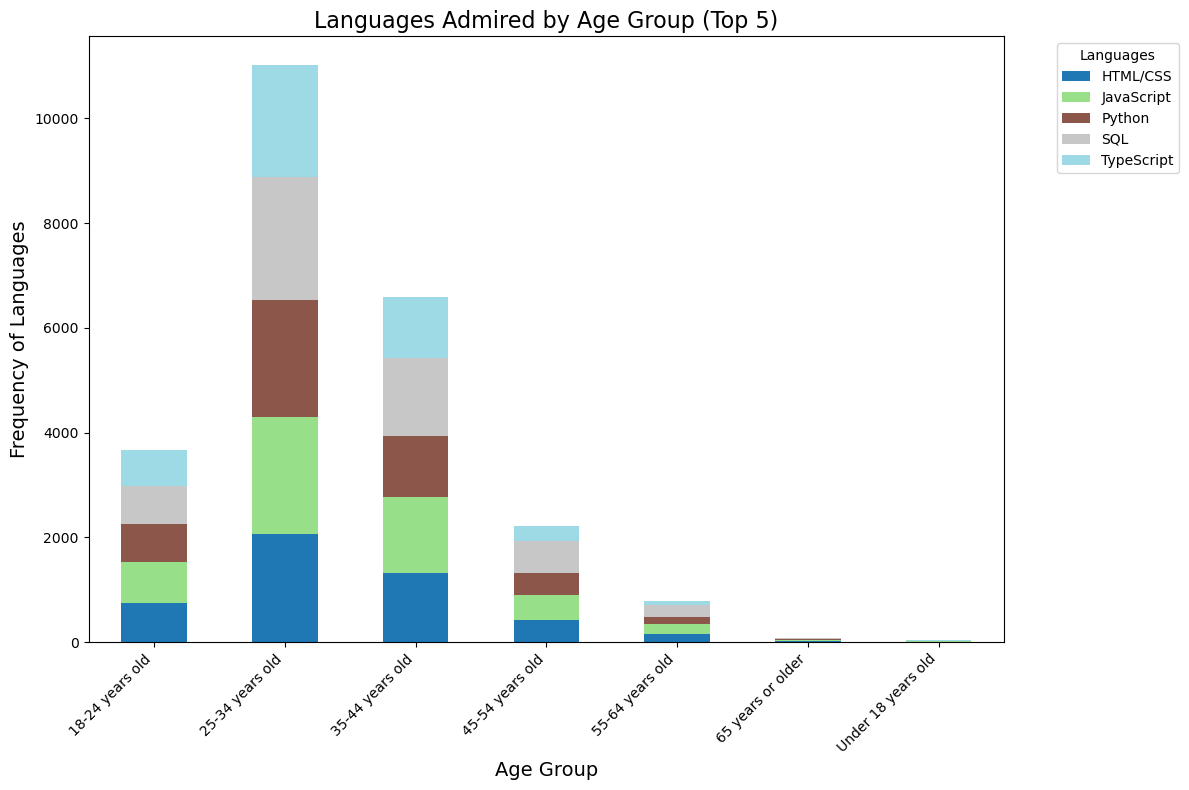

In [94]:
# Clean the data (remove rows with missing values in 'DatabaseWantToWorkWith' and 'Age')
df_filtered_clean = df_filtered.dropna(subset=['LanguageAdmired', 'Age'])

# Split 'DatabaseWantToWorkWith' by ';' and explode the values
df_filtered_clean['LanguageAdmired'] = df_filtered_clean['LanguageAdmired'].str.split(';')
df_exploded = df_filtered_clean.explode('LanguageAdmired')

# Get the top 20 most preferred databases
top_20_databases = df_exploded['LanguageAdmired'].value_counts().nlargest(5).index

# Filter to include only the top 20 databases
df_top_databases = df_exploded[df_exploded['LanguageAdmired'].isin(top_20_databases)]

# Group the data by 'Age' and 'DatabaseWantToWorkWith' to get the frequency counts
age_database_freq = df_top_databases.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart with 'Age' on the x-axis and 'DatabaseWantToWorkWith' on the y-axis
age_database_freq.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

# Customize the chart
plt.title('Languages Admired by Age Group (Top 5)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Frequency of Languages', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()

Platforms (PlatformAdmired) across employment types (e.g., full-time, freelance)

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1074043167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['PlatformAdmired'] = df_filtered_clean['PlatformAdmired'].str.split(';')
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1074043167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['Employment'] = df_filtered_clean['Employment'].str.split(';')


<Figure size 1400x800 with 0 Axes>

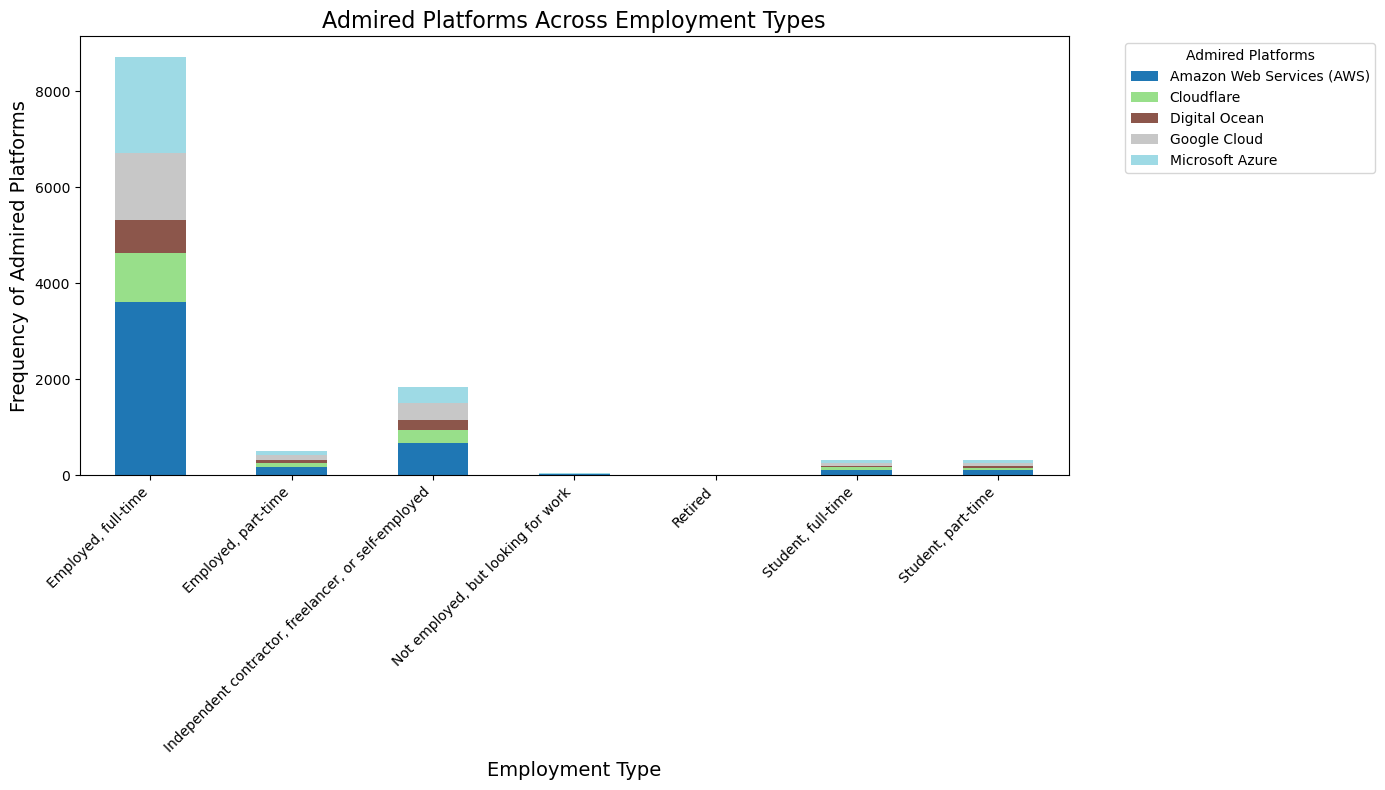

In [98]:
#Clean the data (remove rows with missing values in 'PlatformAdmired' and 'Employment')
df_filtered_clean = df_filtered.dropna(subset=['PlatformAdmired', 'Employment'])

#Split 'PlatformAdmired' and 'Employment' by ';' and explode the values to handle multiple values
df_filtered_clean['PlatformAdmired'] = df_filtered_clean['PlatformAdmired'].str.split(';')
df_filtered_clean['Employment'] = df_filtered_clean['Employment'].str.split(';')

# Explode both 'PlatformAdmired' and 'Employment' columns
df_exploded = df_filtered_clean.explode('PlatformAdmired').explode('Employment')

top_5_platforms = df_exploded['PlatformAdmired'].value_counts().nlargest(5).index

# Filter to include only the top 20 databases
df_top_platforms = df_exploded[df_exploded['PlatformAdmired'].isin(top_5_platforms)]

# Group the data by 'Employment' and 'PlatformAdmired' to get frequency counts
platform_employment_freq = df_top_platforms.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart with 'Employment' on the x-axis and admired platforms on the y-axis
platform_employment_freq.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')

# Customize the chart
plt.title('Admired Platforms Across Employment Types', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Frequency of Admired Platforms', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Admired Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


Job Satisfaction (JobSatPoints_6) by Experience Level

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/894749037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['ExperienceLevel'] = pd.cut(df_filtered_clean['WorkExp'], bins=bins, labels=labels, right=False)
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/894749037.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_satisfaction = df_filtered_clean.groupby('ExperienceLevel')['JobSatPoints_6'].median().reset_index()


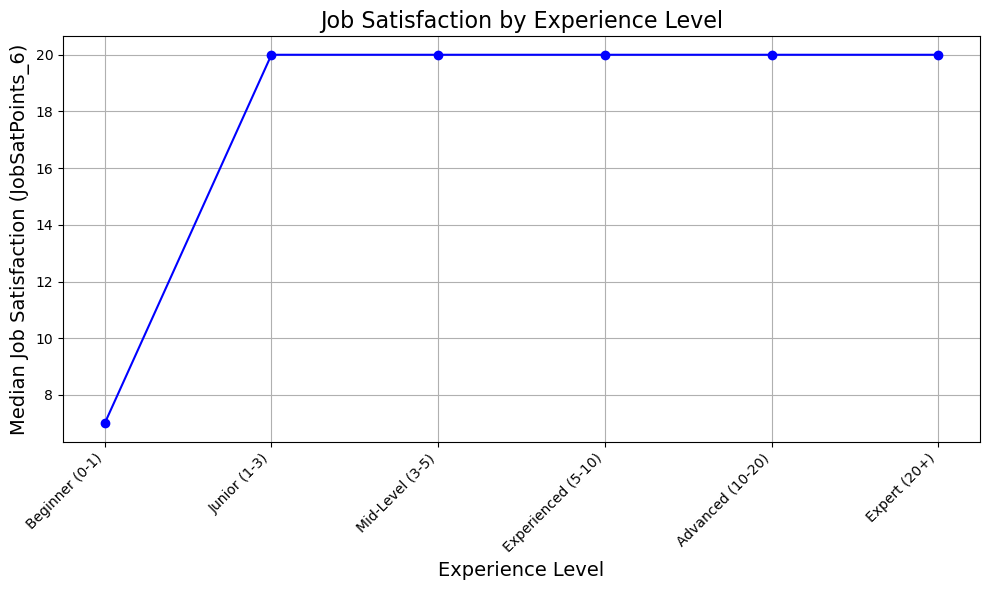

In [101]:
# Clean the data (remove rows with missing values in 'JobSatPoints_6' and 'WorkExp')
df_filtered_clean = df_filtered.dropna(subset=['JobSatPoints_6', 'WorkExp'])

# Convert 'WorkExp' into Experience Level categories
# Define bins for experience levels and their corresponding labels
bins = [0, 1, 3, 5, 10, 20, float('inf')]
labels = ['Beginner (0-1)', 'Junior (1-3)', 'Mid-Level (3-5)', 'Experienced (5-10)', 'Advanced (10-20)', 'Expert (20+)']

df_filtered_clean['ExperienceLevel'] = pd.cut(df_filtered_clean['WorkExp'], bins=bins, labels=labels, right=False)

# Group the data by 'ExperienceLevel' and calculate the median 'JobSatPoints_6'
experience_satisfaction = df_filtered_clean.groupby('ExperienceLevel')['JobSatPoints_6'].median().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Plot the line chart with 'ExperienceLevel' on the x-axis and median 'JobSatPoints_6' on the y-axis
plt.plot(experience_satisfaction['ExperienceLevel'], experience_satisfaction['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Customize the chart
plt.title('Job Satisfaction by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display the chart
plt.tight_layout()
plt.show()


Median ConvertedCompYearly Over Experience Level

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1628411895.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['ExperienceLevel'] = pd.cut(df_filtered_clean['WorkExp'], bins=bins, labels=labels, right=False)
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1628411895.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_compensation = df_filtered_clean.groupby('ExperienceLevel')['ConvertedCompYearly'].median().reset_index()


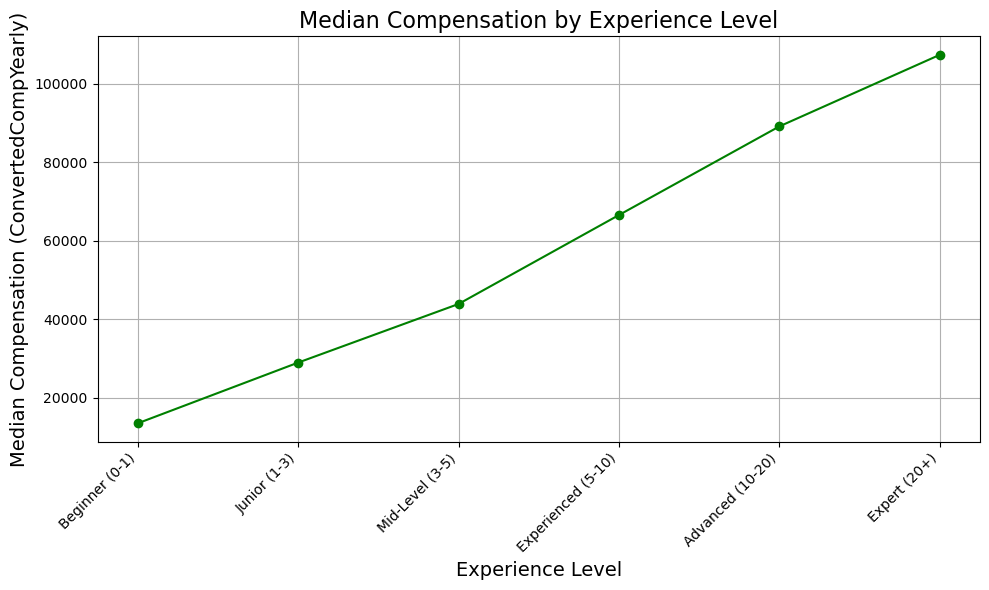

In [105]:

#Clean the data (remove rows with missing values in 'ConvertedCompYearly' and 'WorkExp')
df_filtered_clean = df_no_outliers.dropna(subset=['ConvertedCompYearly', 'WorkExp'])

# Convert 'WorkExp' into Experience Level categories
# Define bins for experience levels and their corresponding labels
bins = [0, 1, 3, 5, 10, 20, float('inf')]
labels = ['Beginner (0-1)', 'Junior (1-3)', 'Mid-Level (3-5)', 'Experienced (5-10)', 'Advanced (10-20)', 'Expert (20+)']

df_filtered_clean['ExperienceLevel'] = pd.cut(df_filtered_clean['WorkExp'], bins=bins, labels=labels, right=False)

# Group the data by 'ExperienceLevel' and calculate the median 'ConvertedCompYearly'
experience_compensation = df_filtered_clean.groupby('ExperienceLevel')['ConvertedCompYearly'].median().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Plot the line chart with 'ExperienceLevel' on the x-axis and median 'ConvertedCompYearly' on the y-axis
plt.plot(experience_compensation['ExperienceLevel'], experience_compensation['ConvertedCompYearly'], marker='o', linestyle='-', color='g')

# Customize the chart
plt.title('Median Compensation by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Median Compensation (ConvertedCompYearly)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display the chart
plt.tight_layout()
plt.show()


Top 5 developer roles

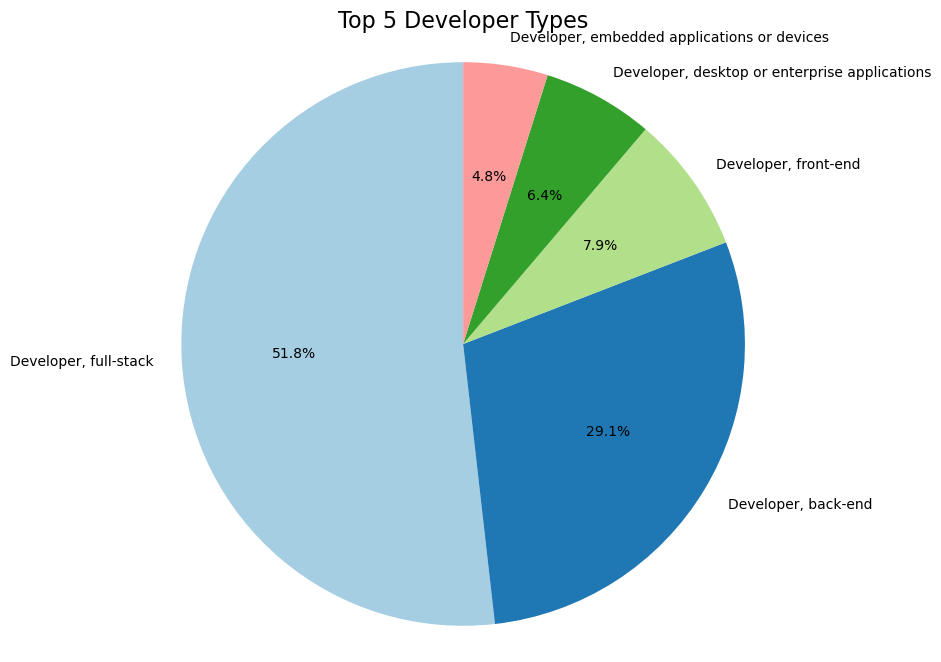

In [107]:
# Split the 'DatabaseWantToWorkWith' column by ';'
df_filtered['Dev_Type_Split'] = df_filtered['DevType'].str.split(';')

# Explode the list into individual rows
df_exploded = df_filtered.explode('Dev_Type_Split')

# Count the occurrences of each database
database_counts = df_exploded['Dev_Type_Split'].value_counts()

# Select the top 5 most frequent databases
top_5_dev_types = database_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_dev_types, labels=top_5_dev_types.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Developer Types', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

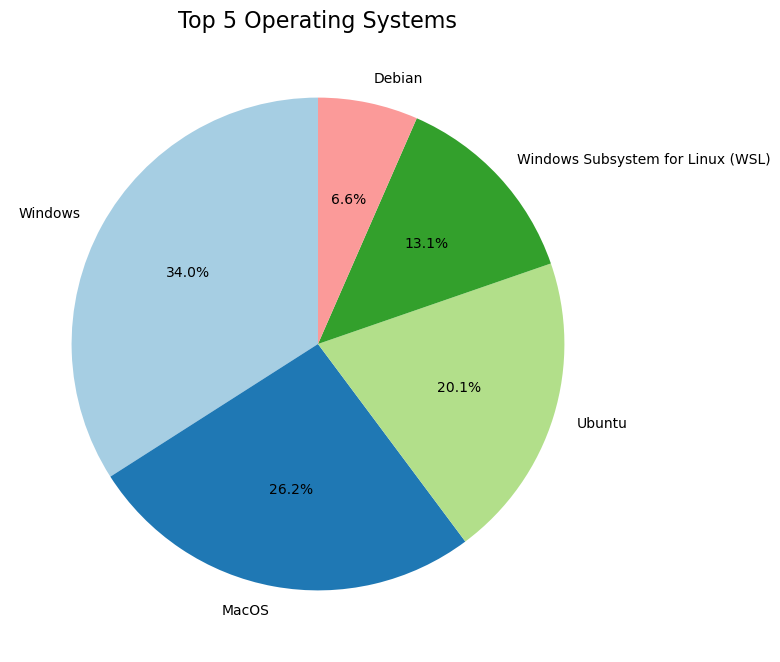

In [113]:
# Split the 'DatabaseWantToWorkWith' column by ';'
df_filtered['Op_Sys_Split'] = df_filtered['OpSysProfessional use'].str.split(';')

# Explode the list into individual rows
df_exploded = df_filtered.explode('Op_Sys_Split')

# Count the occurrences of each database
op_sys_counts = df_exploded['Op_Sys_Split'].value_counts()

# Select the top 5 most frequent databases
top_5_op_sys = op_sys_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_op_sys, labels=top_5_op_sys.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Operating Systems', fontsize=16)
plt.show()

In [115]:
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Map the 'TimeSearching' and 'Age' values to approximate numeric values
time_searching_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,
    None: None  # Handle missing values
}

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None  # Exclude 'Prefer not to say'
}

# Apply the mapping to the 'TimeSearching' and 'Age' columns
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_searching_mapping)
df['TimeAnswering_numeric'] = df['TimeAnswering'].map(time_searching_mapping)
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in 'TimeSearching_numeric' or 'Age_numeric'
df.dropna(subset=['TimeSearching_numeric', 'TimeAnswering_numeric','Age_numeric'], inplace=True)



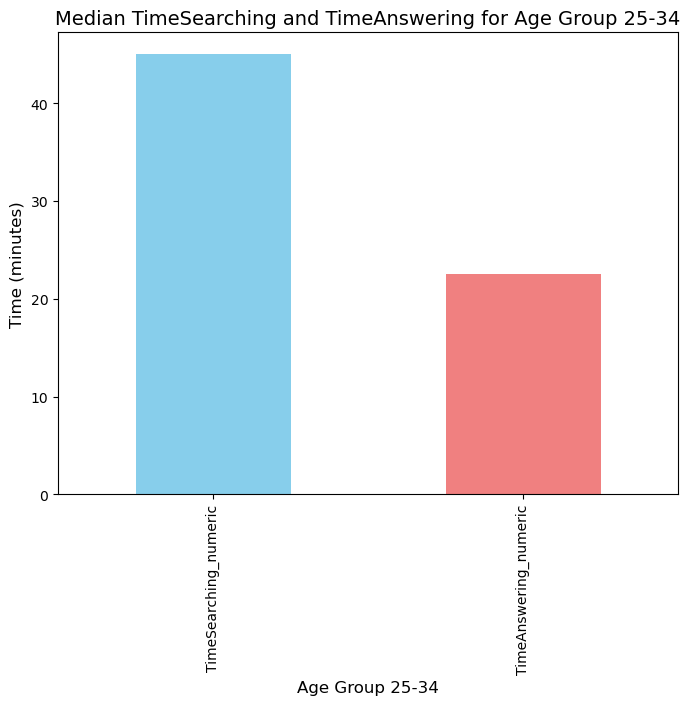

In [119]:

df_filtered = df[df['Age'] == '25-34 years old']

# Step 2: Calculate the median for 'TimeSearching' and 'TimeAnswering'
median_times = df_filtered[['TimeSearching_numeric', 'TimeAnswering_numeric']].median()

# Step 3: Plot a stacked bar chart
plt.figure(figsize=(8, 6))

# Stack the two values in the bar chart
median_times.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.title('Median TimeSearching and TimeAnswering for Age Group 25-34', fontsize=14)
plt.xlabel('Age Group 25-34', fontsize=12)
plt.ylabel('Time (minutes)', fontsize=12)

# Display the chart
plt.show()


/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/2104962457.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_median_age_comp = df.groupby('Age')['CompTotal'].median().reset_index()
/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/2104962457.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='CompTotal', data=df_median_age_comp, palette='viridis', order=age_order)


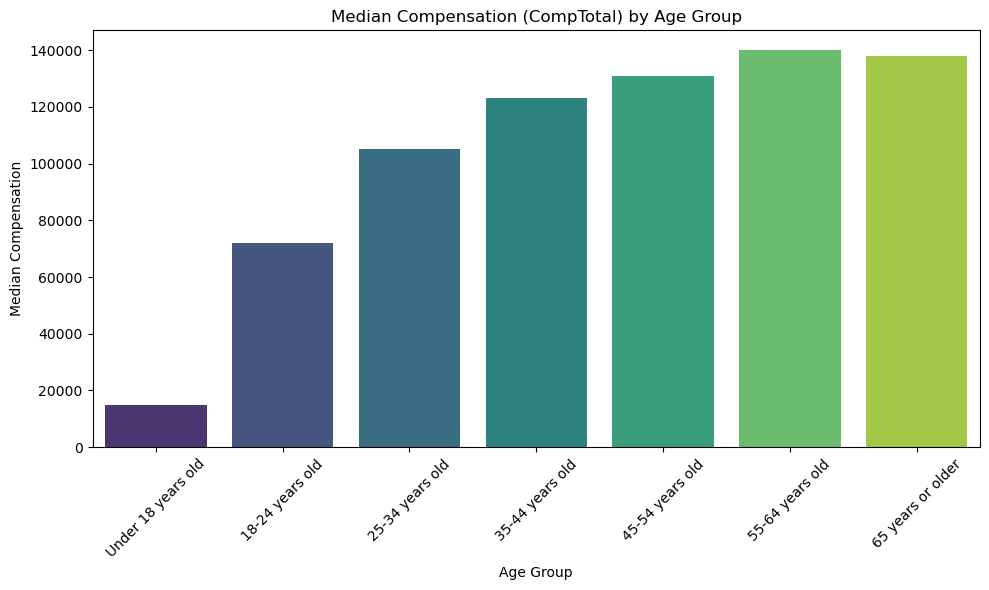

In [121]:
# Define the correct order of age categories
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Convert 'Age' to a categorical type with the defined order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Group by 'Age' and calculate the median of 'CompTotal'
df_median_age_comp = df.groupby('Age')['CompTotal'].median().reset_index()

# Plot the median 'CompTotal' for each age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='CompTotal', data=df_median_age_comp, palette='viridis', order=age_order)

# Customize the plot
plt.title('Median Compensation (CompTotal) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


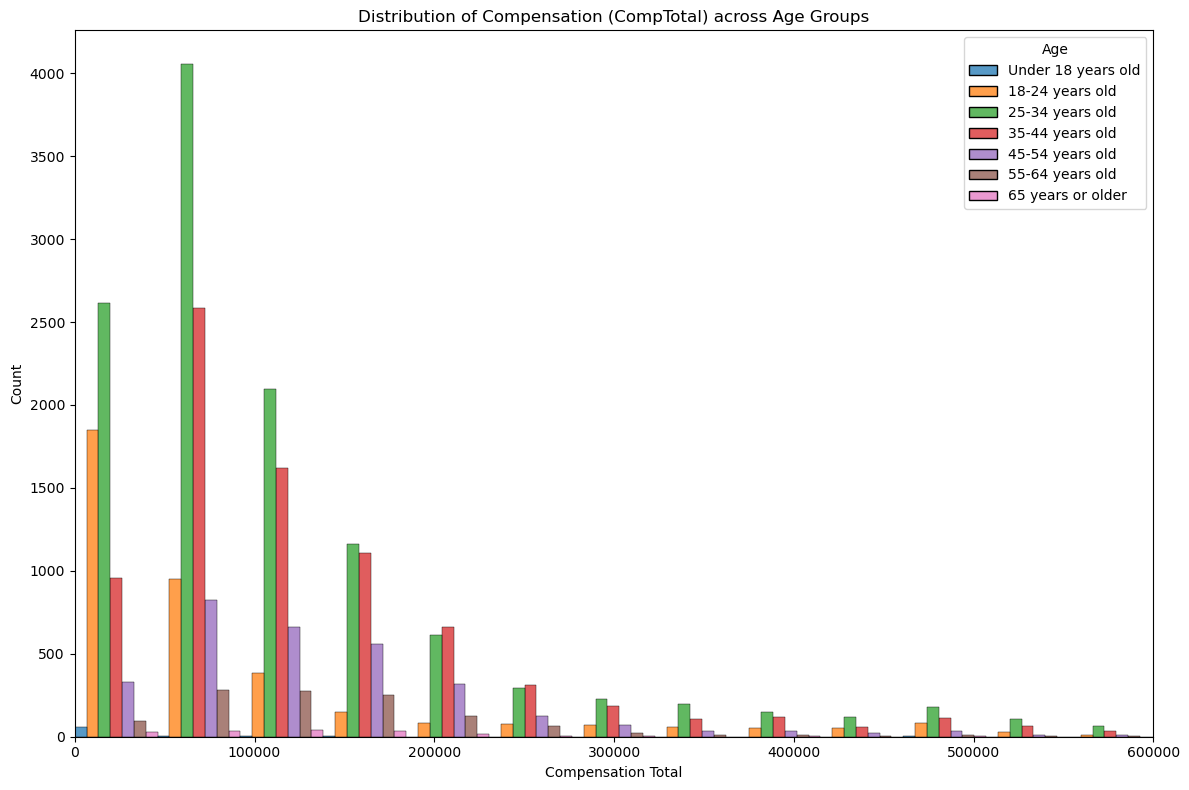

In [123]:

# Filter out outliers
lower_bound = Q1 - 6 * IQR
upper_bound = Q3 + 6 * IQR

df_no_outliers = df_comp_cleaned[(df_comp_cleaned['CompTotal'] >= lower_bound) & 
                                 (df_comp_cleaned['CompTotal'] <= upper_bound)]

# Remove rows with missing or invalid CompTotal values
df_filtered = df_no_outliers[df_no_outliers['CompTotal'].notna()]

# Define age categories to maintain order
age_categories = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
                  '45-54 years old', '55-64 years old', '65 years or older']

# Filter dataframe by these categories
df_filtered = df_filtered[df_filtered['Age'].isin(age_categories)]

# Plot histograms for CompTotal across different age groups
plt.figure(figsize=(12, 8))

# Use `hue_order` to specify the order of the categories
hist_plot = sns.histplot(data=df_filtered, x='CompTotal', hue='Age', multiple='dodge', palette='tab10', bins=30, hue_order=age_categories)

# Customize the plot
plt.title('Distribution of Compensation (CompTotal) across Age Groups')
plt.xlabel('Compensation Total')
plt.ylabel('Count')

# Adjust the x-axis to cutoff at 400,000
plt.xlim(0, 600000)

# Customize the x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1788818570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Age', order=age_categories, palette='Set2')


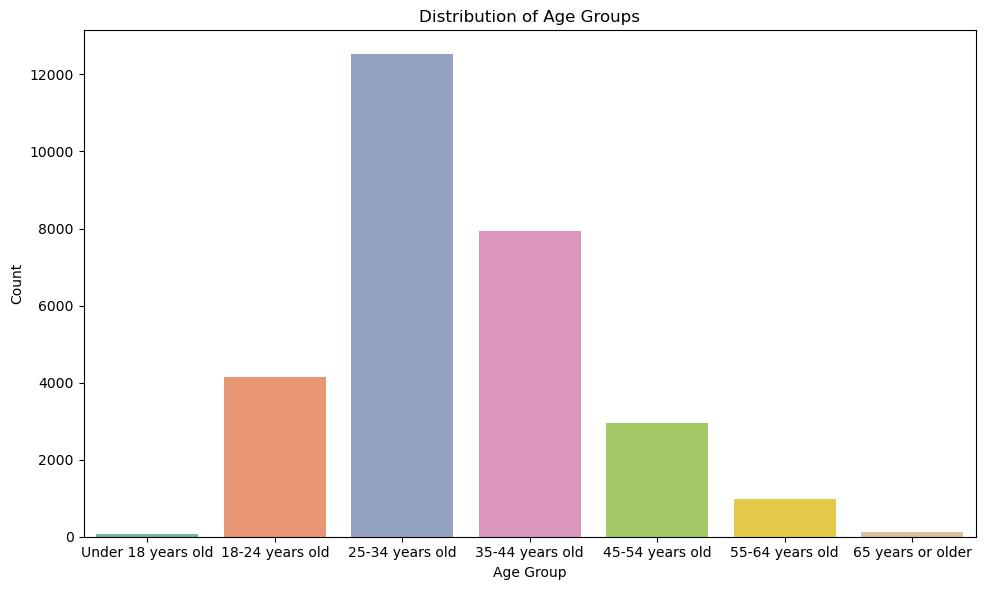

In [125]:

# Define age categories to maintain order
age_categories = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
                  '45-54 years old', '55-64 years old', '65 years or older']

# Filter dataframe by these categories (if necessary)
df_filtered = df[df['Age'].isin(age_categories)]

# Plot histogram of Age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Age', order=age_categories, palette='Set2')

# Customize the plot
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


Distribution of TimeSearching (time spent searching for information) for respondents across different age groups.

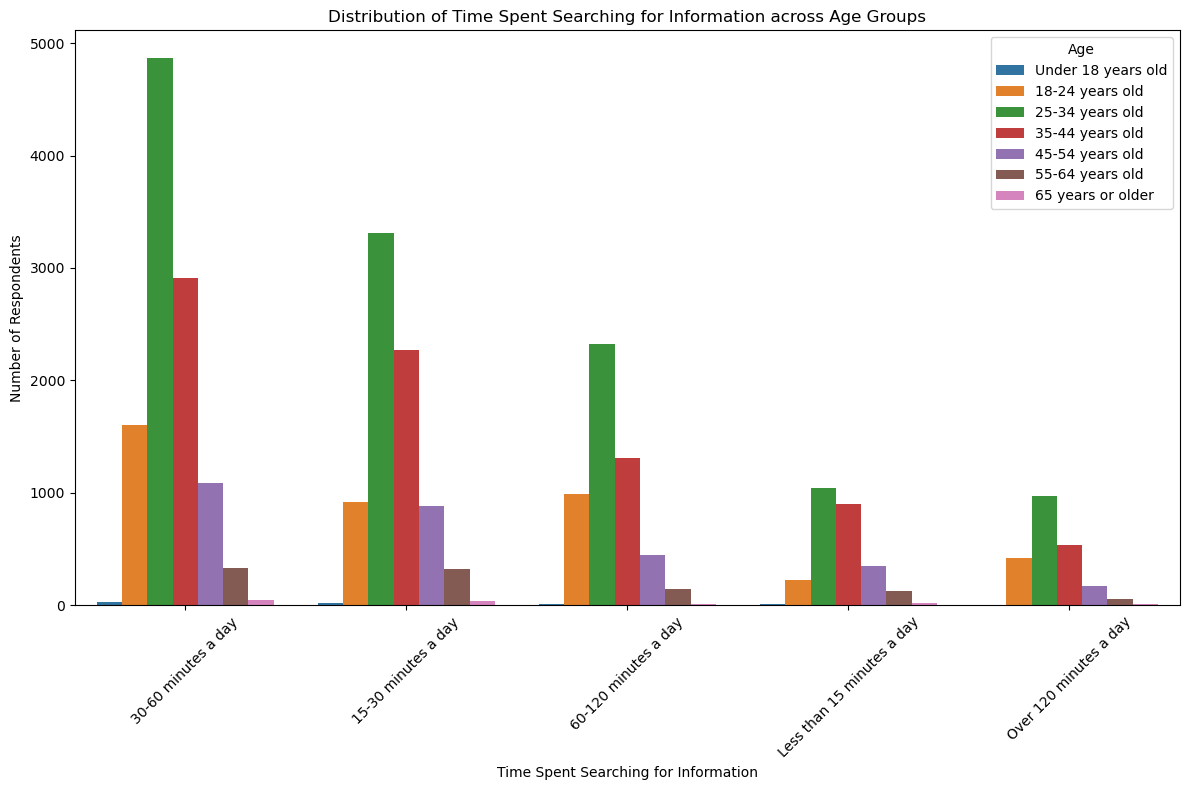

In [127]:


# Define age categories to maintain order
age_categories = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
                  '45-54 years old', '55-64 years old', '65 years or older']

# Filter out invalid or missing 'TimeSearching' values
df_filtered = df[df['TimeSearching'].notna()]

# Ensure 'Age' is in the specified order
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_categories, ordered=True)

# Plot a bar chart for TimeSearching across different age groups
plt.figure(figsize=(12, 8))

# Create a bar plot with 'TimeSearching' as the categorical variable and 'Age' as the grouping variable
sns.countplot(data=df_filtered, x='TimeSearching', hue='Age', order=df_filtered['TimeSearching'].value_counts().index, palette='tab10')

# Customize the plot
plt.title('Distribution of Time Spent Searching for Information across Age Groups')
plt.xlabel('Time Spent Searching for Information')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Top 5 databases.


/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/3647325951.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_databases.index, y=top_5_databases.values, palette='viridis')


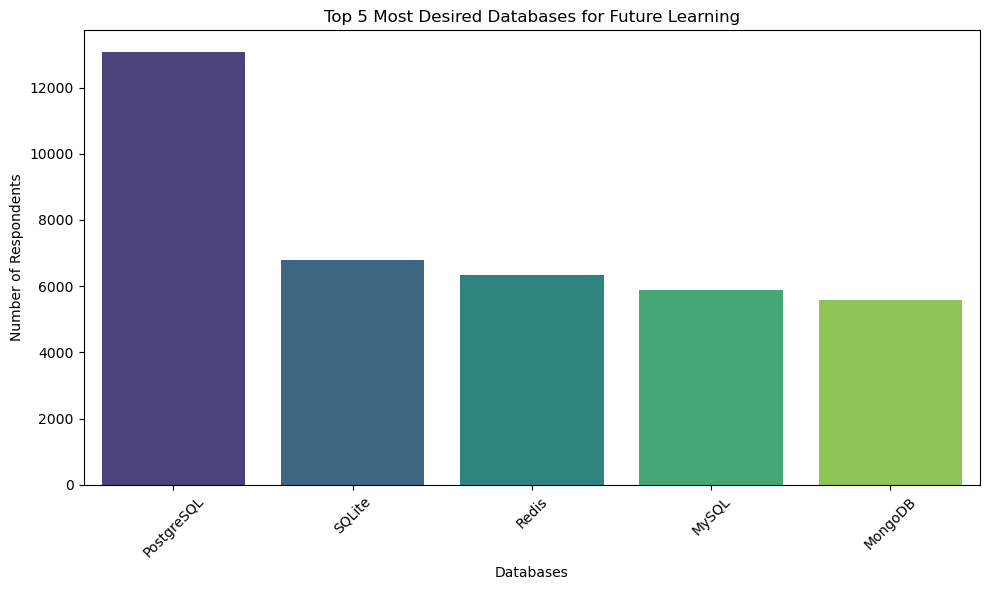

In [129]:
# Split the 'DatabaseWantToWorkWith' column into individual databases
df['DatabaseWantToWorkWith_split'] = df['DatabaseWantToWorkWith'].str.split(';')

# Explode the lists into individual rows
df_exploded = df.explode('DatabaseWantToWorkWith_split')

# Count the occurrences of each database
database_counts = df_exploded['DatabaseWantToWorkWith_split'].value_counts()

# Select the top 5 most desired databases
top_5_databases = database_counts.head(5)

# Plot a histogram for the top 5 databases
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_databases.index, y=top_5_databases.values, palette='viridis')

# Customize the plot
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Databases')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


Job Satisfaction Scores Across Professional Coding Experience (Binned)


<Figure size 1200x600 with 0 Axes>

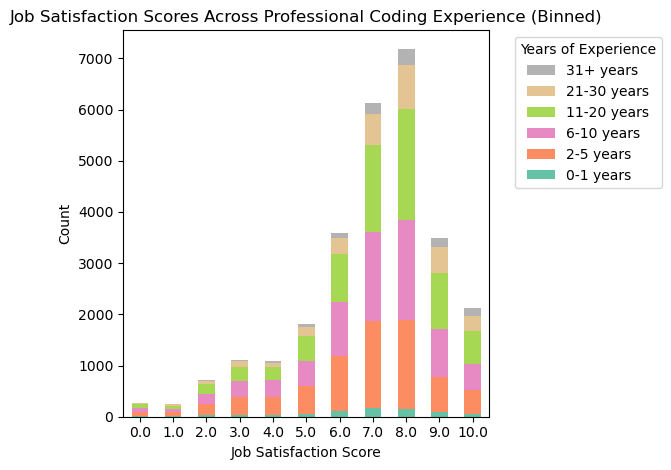

In [131]:
# Define bins for 'YearsCodePro'
bins = [0, 1, 5, 10, 20, 30, 100]  # Adjust the bins based on your needs
labels = ['0-1 years', '2-5 years', '6-10 years', '11-20 years', '21-30 years', '31+ years']

# Convert 'YearsCodePro' to numeric (with previously defined mapping)
years_code_pro_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51,
}

# Convert the 'YearsCodePro' values to numeric, using the mapping for non-numeric entries
df['YearsCodePro_numeric'] = df['YearsCodePro'].replace(years_code_pro_mapping)

# For the other numeric years, convert them directly to integers
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro_numeric'], errors='coerce')

# Bin the 'YearsCodePro_numeric' column
df['YearsCodePro_binned'] = pd.cut(df['YearsCodePro_numeric'], bins=bins, labels=labels, right=False)

# Remove rows with missing values
df_filtered = df.dropna(subset=['YearsCodePro_binned', 'JobSat'])

# Create a count of JobSat scores for each experience group
job_sat_counts = pd.crosstab(df_filtered['YearsCodePro_binned'], df_filtered['JobSat'])

# Transpose the data so each experience group is a row
job_sat_counts = job_sat_counts.T

# Plot the transposed histogram of JobSat scores across YearsCodePro bins
plt.figure(figsize=(12, 6))

# Plot each JobSat score group as a stacked bar
ax = job_sat_counts.plot(kind='bar', stacked=True, colormap='Set2')

# Customize the plot
plt.title('Job Satisfaction Scores Across Professional Coding Experience (Binned)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Make sure the x-axis labels are readable

# Reverse the order of the legend
handles, labels = ax.get_legend_handles_labels()  # Get the handles and labels from the plot
ax.legend(handles[::-1], labels[::-1], title='Years of Experience', loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.tight_layout()
plt.show()


Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6):

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_88384/1496040132.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='YearsCodePro_binned', y='JobSatPoints_6', palette='Set2')


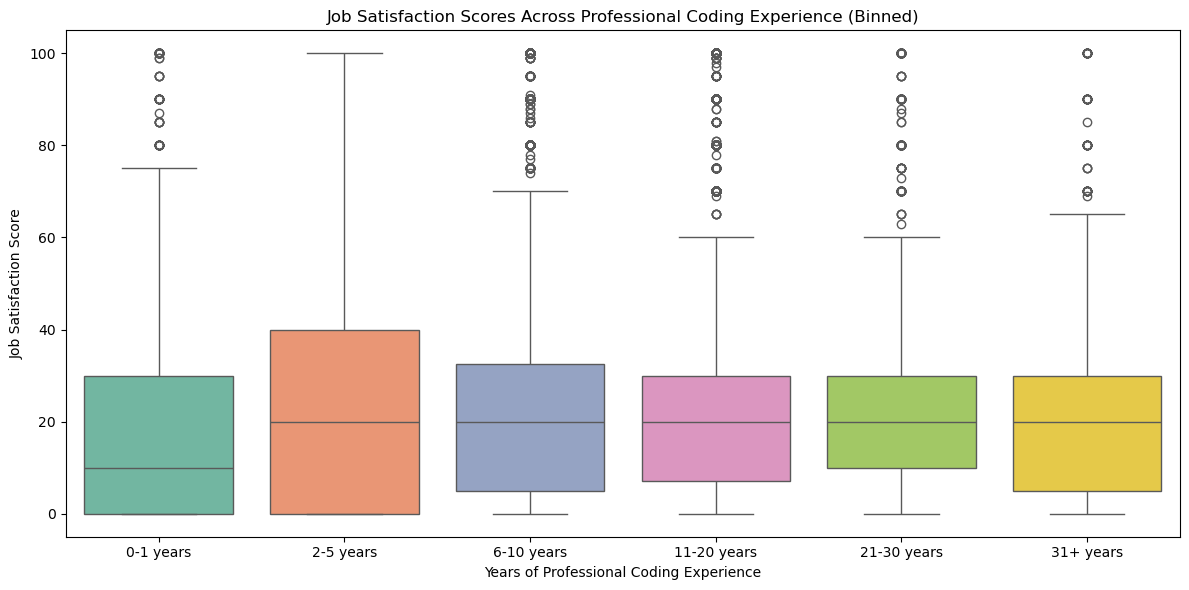

In [133]:
# Define bins for 'YearsCodePro'
bins = [0, 1, 5, 10, 20, 30, 100]  # Adjust the bins based on your needs
labels = ['0-1 years', '2-5 years', '6-10 years', '11-20 years', '21-30 years', '31+ years']

# Convert 'YearsCodePro' to numeric (with previously defined mapping)
years_code_pro_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51,
}

# Convert the 'YearsCodePro' values to numeric, using the mapping for non-numeric entries
df['YearsCodePro_numeric'] = df['YearsCodePro'].replace(years_code_pro_mapping)

# For the other numeric years, convert them directly to integers
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro_numeric'], errors='coerce')

# Bin the 'YearsCodePro_numeric' column
df['YearsCodePro_binned'] = pd.cut(df['YearsCodePro_numeric'], bins=bins, labels=labels, right=False)

# Remove rows with missing values
df_filtered = df.dropna(subset=['YearsCodePro_binned', 'JobSatPoints_6'])

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='YearsCodePro_binned', y='JobSatPoints_6', palette='Set2')

# Customize the plot
plt.title('Job Satisfaction Scores Across Professional Coding Experience (Binned)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')

# Show the plot
plt.tight_layout()
plt.show()


Distribution of `MainBranch'

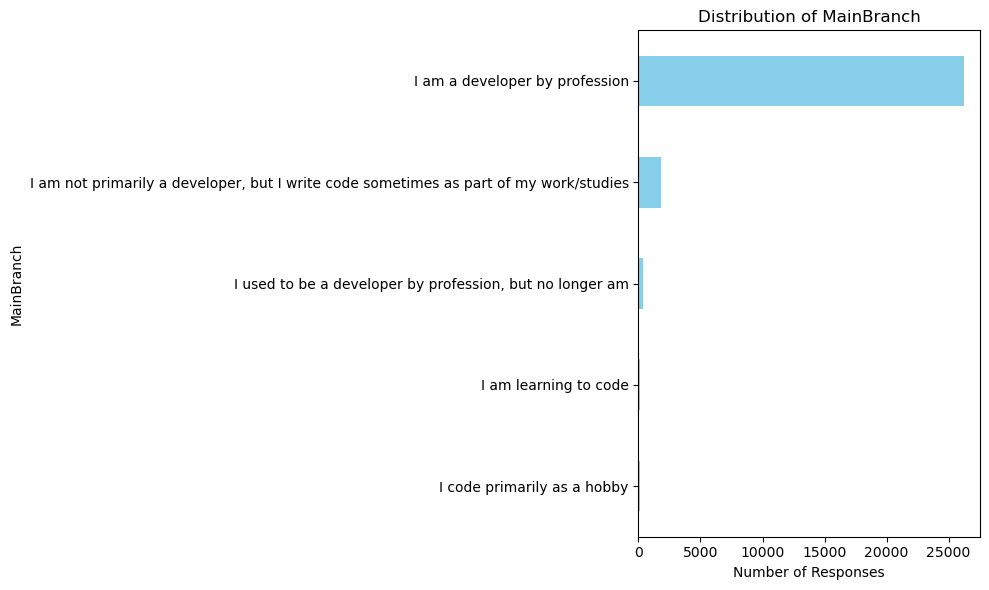

In [135]:
# Count occurrences in 'MainBranch' column
main_branch_counts = df['MainBranch'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Number of Responses')
plt.ylabel('MainBranch')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top

# Display the plot
plt.tight_layout()
plt.show()


### Close the Database Connection


In [137]:
conn.close()